## Lab 3 -  Clustering, Association Rules, or Recommenders 
#### By: David Wei, Sophia Wu, Dhruba Dey, Queena Wang

## -------------------- Introduction --------------------
In this exercise, we will be building the models on the Lending Club's loan dataset which includes data from the beginning of 2012 to the middle of 2016. The goal this exercise will be to mainly predict the loan status of a lender and the likeliness of their lending behavior using a series of Clustering models as well as a Collaborative Filtering Model.

<u>**Table of Contents**</u>
1. [Introduction](#---------------------Introduction---------------------)
2. [Business Understanding](#--------------------Business-Understanding--------------------)
3. [Data Understanding - 1](#---------------------Data-Understanding---1---------------------)
4. [Data Understanding - 2](#---------------------Data-Understanding---2---------------------)
5. [Modeling and Evaluation 1](#---------------------Modeling-and-Evaluation-1---------------------)
6. [Modeling and Evaluation 2 - Evaluation](#---------------------Modeling-and-Evaluation-2---Evaluation---------------------)
7. [Modeling and Evaluation 3 - Visuals](#---------------------Modeling-and-Evaluation-3---Visuals---------------------)
8. [Modeling and Evaluation 4 - Summary](#---------------------Modeling-and-Evaluation-4---Summary---------------------)
9. [Deployment](#---------------------Deployment---------------------)
10. [Exceptional Work](#---------------------Exceptional-Work---------------------)

## -------------------- Business Understanding --------------------
[Back to Top](#---------------------Introduction---------------------)

Lending Club facilitates and manages peer-to-peer lending, where people can lend their money to other people and earn the interest rate income. This innovation has opened the investment opportunities for many people who are willing to earn extra income and assume some lending risk. However, Lending Club specializes in identifying the eligible borrowers and assessing their risk, which is used in determining the borrowing rate. The people who lend the money earn the interest income which is the borrowing rate minus the fees that Lending Club keeps for itself as its revenue. In addition, in order to safeguard the peer lenders, Lending Club does not originate a long-term loan and a large loan such as mortgagebecause it does not want to assume a duration risk of loans and associate a large amount with a single borrower. 

The motivation of selecting the lending datasets is myriad. First, we collectively decide which industry we should be pursuing for this project as we would like to have an experiencewith the dataset of multiple industries. Finance rose to the top as we had not done a project on finance data. Secondly, we have always looked for a large dataset because we know we will eventually encounter high volumes of dataset in the real world. Third, the lending industry poses a unique challenge in terms of sparsity of some events such as loan default, which, though rare, has a grave impact on the lenders’ business performances. In another way, this dataset challenges us to deal with a very unbalanced dataset, and we would like togain firsthand experience on this. 

Here is the list of features available in the dataset: 

    1.Exceptional WorkLoan_number: Unique identifier for a loan
    2.Amount_borrowed: The amount borrowed at the time of loan origination.
    3.Term: Duration for which a loan is offered. Example: 12, 36, 60 months
    4.Borrower rate: The interest rate at which the borrower agrees to take a loan.
    5.Installment: Amount to be paid in each installment. 
    6.Grade: The credit worthiness of the borrower
    7.Origination date: The data when the loan was issued.
    8.Listing title: Types of loans such as car, vacation, wedding, moving etc. 
    9.Principal balance: How much amount is still balanced to be paid.
    10.Principal paid: How much principal amount is paid. 
    11.Interest paid: How much amount is paid for the interest of a loan. 
    12.Late_fees_paid: Amount paid due to the lateness of payment.
    13.Debt_sale_proceeds_received: Amt received from the sale of an asset, mostly when it defaults.
    14.last_payment_date: The date when the last payment was made.
    15.next_payment_due_date: The date when the next payment is due. 
    16.days_past_due: The number of days past beyond the due date. 
    17.loan_status_description: The state of loan such as completed, defaulted, charged-off, current.
    18.data_source: It is Lending Club, generous enough to share the data. 

Our objective is to predict how the loan will span out, whether it would end up as a defaulted, completed, or charged-off. Therefore, we would like to exclude the loan with “current” status because the model will eventually be deployed to answer that question. That will bring down the number of rows of the dataset from 1 million to 800 thousand. In the data understanding section, we discussed how we have dealt with unbalanced data utilizing an under-sampling approach. We have removed the dates – “Origination date”, “Last payment date”, and “Next payment date” – as the information pertaining to these data is encapsulated in Terms, Principal balanced, and Principal paid. We also take out Loan number and Data source (Lending Club) because these will not add meaningful value to our analysis. 
After removing the data based on our domain knowledge, we are left with 4 categorical features and 11 numerical features. Out of 4 categorical features which are Term, Listing title, Grade and Loan status, Loan status is used as the response variable, which has 4 labels– defaulted, completed, charged-off and cancelled. However, we have run PCA, but that doesnot help us remove any variables because those ranked low have useful purpose in pursuingour quest for finding the loan status. We have done exhaustive modeling from a clustering perspective and added one recommendation model using the surprise package. When it comes to model evaluation, we have used the accuracy matrix and silhouette scores. Moreover, the plot visualization has been leveraged to determine the optimal model because it gives us the clue as to how muchthe clusters are overlapped. Some cases, we ran iterative methods to ascertain the parameters for the optimal model. 

## -------------------- Data Understanding - 1 --------------------
[Back to Top](#---------------------Introduction---------------------)

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') #ignoring warnings
import missingno as msno
from __future__ import print_function
from IPython.display import display, HTML

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line

#general sklearn libraries
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean
import ptitprince as pt
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as cross_validation
from sklearn.model_selection import cross_val_score
import sklearn.linear_model as linear_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, RFE, SelectFromModel
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, auc, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit, StratifiedShuffleSplit

#model-linear
from sklearn.linear_model import LogisticRegression, SGDClassifier

#model-ensemble
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#model-classifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
%%time
data = pd.read_csv(r'C:/Users/David/ML Models/Data Files/Lending_Tree_Master_Loan_Summary_2014.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875146 entries, 0 to 2875145
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   loan_number                  int64  
 1   amount_borrowed              float64
 2   term                         int64  
 3   borrower_rate                float64
 4   installment                  float64
 5   grade                        object 
 6   origination_date             object 
 7   listing_title                object 
 8   principal_balance            float64
 9   principal_paid               float64
 10  interest_paid                float64
 11  late_fees_paid               float64
 12  debt_sale_proceeds_received  float64
 13  last_payment_date            object 
 14  next_payment_due_date        object 
 15  days_past_due                int64  
 16  loan_status_description      object 
 17  data_source                  object 
dtypes: float64(8), int64(3), object(7)
memory 

In [3]:
data.head()

loan_number  amount_borrowed  term  borrower_rate  installment grade  \
0     10149342          27050.0    36         0.1099       885.46     B   
1     10149488           4800.0    36         0.1099       157.13     B   
2     10148122          12000.0    36         0.0762       373.94     A   
3     10119623          12000.0    36         0.1199       398.52     B   
4     10159498          12000.0    36         0.0662       368.45     A   

   origination_date       listing_title  principal_balance  principal_paid  \
0  2013-12-01T00:00  debt_consolidation                0.0         27050.0   
1  2013-12-01T00:00    home_improvement                0.0          4800.0   
2  2013-12-01T00:00  debt_consolidation                0.0         12000.0   
3  2013-12-01T00:00  debt_consolidation                0.0         12000.0   
4  2013-12-01T00:00  debt_consolidation                0.0         12000.0   

   interest_paid  late_fees_paid  debt_sale_proceeds_received  \
0        4702.53             0.0                          0.0   
1         357.52             0.0                          0.0   
2        1397.54             0.0                          0.0   
3        2346.48             0.0                          0.0   
4        1263.95             0.0                          0.0   

  last_payment_date next_payment_due_date  days_past_due  \
0  2016-07-01T00:00      2016-08-01T00:00              0   
1  2014-09-01T00:00      2014-10-01T00:00              0   
2  2016-06-01T00:00      2016-07-01T00:00              0   
3  2017-01-01T00:00      2017-02-01T00:00              0   
4  2017-01-01T00:00      2017-02-01T00:00              0   

  loan_status_description   data_source  
0               COMPLETED  Lending Club  
1               COMPLETED  Lending Club  
2               COMPLETED  Lending Club  
3               COMPLETED  Lending Club  
4               COMPLETED  Lending Club

In [4]:
data.describe()

loan_number  amount_borrowed          term  borrower_rate  \
count  2.875146e+06     2.875146e+06  2.875146e+06   2.875146e+06   
mean   5.076601e+07     1.447258e+04  4.294869e+01   1.382498e-01   
std    4.813839e+07     8.763608e+03  1.089006e+01   5.515687e-02   
min    5.571600e+04     1.000000e+03  1.200000e+01   5.310000e-02   
25%    8.654122e+05     8.000000e+03  3.600000e+01   9.920000e-02   
50%    4.516220e+07     1.200000e+04  3.600000e+01   1.299000e-01   
75%    9.391978e+07     2.000000e+04  6.000000e+01   1.677000e-01   
max    1.360671e+08     4.000000e+04  6.000000e+01   3.192000e-01   

        installment  principal_balance  principal_paid  interest_paid  \
count  2.875146e+06       2.875146e+06    2.875146e+06   2.875146e+06   
mean   4.335797e+02       4.944927e+03    8.433969e+03   2.214817e+03   
std    2.565165e+02       7.528232e+03    7.940062e+03   2.430349e+03   
min    4.930000e+00       0.000000e+00   -1.500000e+01  -8.255100e+00   
25%    2.481491e+02       0.000000e+00    2.250702e+03   6.334700e+02   
50%    3.732400e+02       0.000000e+00    6.000000e+03   1.425910e+03   
75%    5.718100e+02       7.973770e+03    1.200000e+04   2.891568e+03   
max    2.251506e+03       4.000000e+04    4.000000e+04   2.788480e+04   

       late_fees_paid  debt_sale_proceeds_received  days_past_due  
count    2.875146e+06                 2.875146e+06   2.875146e+06  
mean     2.622497e+00                 7.711331e+01   7.390529e+01  
std      2.124300e+01                 5.337221e+02   2.221053e+02  
min     -9.500000e-09                 0.000000e+00   0.000000e+00  
25%      0.000000e+00                 0.000000e+00   0.000000e+00  
50%      0.000000e+00                 0.000000e+00   0.000000e+00  
75%      0.000000e+00                 0.000000e+00   6.000000e+01  
max      1.676850e+03                 3.985955e+04   2.402000e+03

#### Response Variable Unique Values

In [5]:
print(data['loan_status_description'].unique())

['COMPLETED' 'CHARGEOFF' 'CURRENT' 'DEFAULTED' 'CANCELLED']


In [6]:
print(data['listing_title'].unique())

['debt_consolidation' 'home_improvement' 'credit_card' 'other'
 'major_purchase' 'small_business' 'house' 'moving' 'medical' 'car'
 'vacation' 'renewable_energy' 'wedding' 'educational' nan]


In [7]:
print(data['term'].unique())

[36 60 12]


### Checking for Empty Data
We can see that the 'listing_title' has a chunk of missing data, we will remove them from our dataset

<AxesSubplot:>

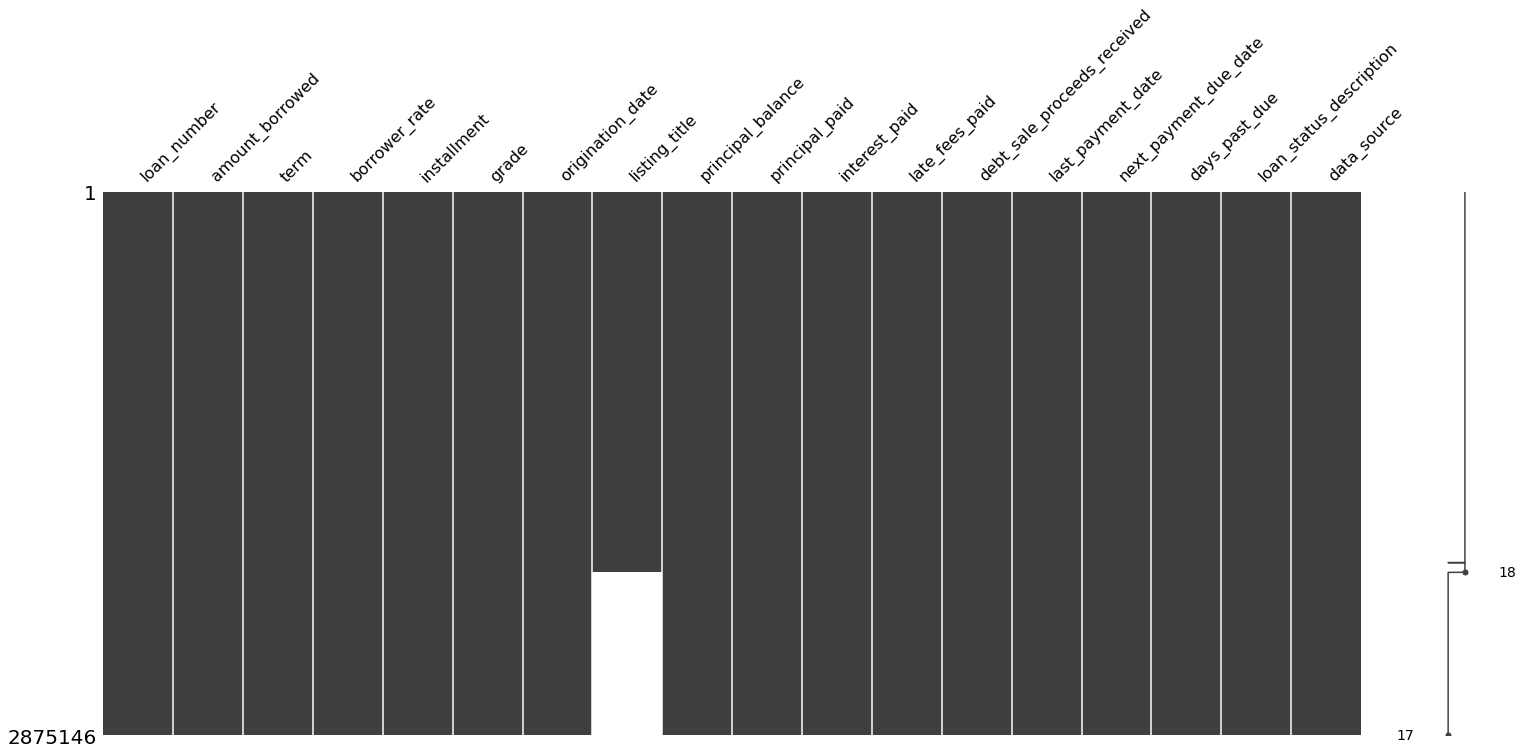

In [8]:
msno.matrix(data)

In [9]:
df_before_NA = data.copy()
data = data.dropna()
print('before NA removed: '+str(len(df_before_NA)))
print('after NA removed: '+str(len(data)))
print('# of Records Removed: '+str(len(df_before_NA)-len(data)))

before NA removed: 2875146
after NA removed: 2012068
# of Records Removed: 863078


### Checking for Duplicates

#### Checking per unique key
Since our each record of our dataset is per an individual customer loan, we will check for duplicates based on the loan_number, the primary key for this table.

Based on our test for uniquness on the primary key, we can see multiple entries for the same loan_number. We will remove tehse duplicates and only preserve 1 record.

In [10]:
dupe_test = data[data.duplicated(['loan_number'], keep=False)].sort_values('loan_number')
if len(dupe_test) < 1:
    print("no duplicates")
elif len(dupe_test) > 1:
    print(dupe_test)

         loan_number  amount_borrowed  term  borrower_rate  installment grade  \
753965        694613          10000.0    36         0.1399   341.730000     C   
1963048       694613           5500.0    36         0.2659   223.330652     F   
419628        694891          15675.0    36         0.0890   497.740000     A   
1964206       694891           6000.0    60         0.2871   189.393290     F   
1963550       694930          15000.0    36         0.0791   469.422949     B   
...              ...              ...   ...            ...          ...   ...   
2013392      1080405          15000.0    36         0.0894   476.577229     B   
2012821      1081206          15000.0    36         0.2965   633.901534     F   
187537       1081206           7000.0    36         0.0890   222.280000     A   
187512       1081779           7050.0    36         0.0790   220.600000     A   
2013192      1081779          25000.0    36         0.1608   879.913549     D   

         origination_date  

In [11]:
data_before_dupe = data.copy()
print('before duplicates removed: '+str(data.shape[0]))
data = data.drop_duplicates(subset=['loan_number'], keep='last')
print("# of records after removing duplicates: "+str(data.shape[0]))
print('# of Records Removed: '+str(len(data_before_dupe)-len(data)))

before duplicates removed: 2012068
# of records after removing duplicates: 2011934
# of Records Removed: 134


#### Checking duplicates on a row-by-row basis
We can see that by grouping all of our columns and then finding any counts greater than 1 (indicator of duplicate), we found none.

In [12]:
dupe_row_test = data.groupby(data.columns.tolist(),as_index=False).size()
print(dupe_row_test['size'].max())

1


## Feature Select

### Removing current load status from original dataframe
Our response variable has a attribute value of 'Current' which represents all current and outgoing loan types. We don't really need this attribute as discussed in the Business Understanding section so we will remove it from our dataset.

In [147]:
data = data[data['loan_status_description'] != 'CURRENT']
print(len(data))
print(data['loan_status_description'].unique())

1004083
['COMPLETED' 'CHARGEOFF' 'DEFAULTED' 'CANCELLED']


### Feature Select - PCA
Performing PCA to identify the most contributing numerical variables

In [15]:
#creating the data containing numberical variables ; removed loan number here
df_num = data[['amount_borrowed','borrower_rate','installment', 'principal_balance','principal_paid',
                 'late_fees_paid', 'debt_sale_proceeds_received','days_past_due']]

In [16]:
# creating a series with numerical values
names = np.array(['amount_borrowed','borrower_rate','installment', 'principal_balance','principal_paid',
                 'late_fees_paid', 'debt_sale_proceeds_received','days_past_due'])
features_names = pd.Series(names)
features_names

0                amount_borrowed
1                  borrower_rate
2                    installment
3              principal_balance
4                 principal_paid
5                 late_fees_paid
6    debt_sale_proceeds_received
7                  days_past_due
dtype: object

In [17]:
from sklearn.decomposition import PCA
# Standardize the feature
from sklearn.preprocessing import StandardScaler #for scaling
df_num= StandardScaler().fit_transform(df_num)
n = 3
pca = PCA(n_components=n)
df_num_pca = pca.fit(df_num).transform(df_num) # fit data and then transform it

In [18]:
# the explained variance indicates how much information (variance) can be attributed to each of the principal components
pca.explained_variance_ratio_
Sum = sum(pca.explained_variance_ratio_) 
print(pca.explained_variance_ratio_)
print(Sum*100) ## first 6 components explains 84.3% of the variation 
print('first', n , 'components explains', round(Sum*100), 'percentage of the variation')

[0.33764138 0.22703135 0.12816133]
69.28340653445156
first 3 components explains 69 percentage of the variation


In [19]:
pca = PCA(n_components=3)
df_num_pca = pca.fit(df_num).transform(df_num) # fit data and then transform it

# print the components
print ('pca:', pca.components_.transpose())

pca: [[ 0.58887205  0.11570466 -0.0327772 ]
 [ 0.07754974  0.36677705  0.14385496]
 [ 0.58480601  0.11243726 -0.02130085]
 [ 0.00935242  0.03986045  0.85772696]
 [ 0.54209817 -0.27607283 -0.03198322]
 [ 0.06049715  0.18508873  0.44623996]
 [ 0.03968077  0.59130307 -0.1646051 ]
 [-0.07762286  0.61460774 -0.12179603]]


In [20]:
# find the weights of the features in the 6 two components

def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:-5])
        tmp_array.append(tmp_string)
    return tmp_array

# assign weights with features
pca_weight_strings = get_feature_names_from_weights(pca.components_, features_names)
pca_weight_strings

['0.59*amount_bor +0.08*borrower +0.58*instal +0.01*principal_ba +0.54*principal +0.06*late_fees +0.04*debt_sale_proceeds_rec -0.08*days_pas ',
 '0.12*amount_bor +0.37*borrower +0.11*instal +0.04*principal_ba -0.28*principal +0.19*late_fees +0.59*debt_sale_proceeds_rec +0.61*days_pas ',
 '-0.03*amount_bor +0.14*borrower -0.02*instal +0.86*principal_ba -0.03*principal +0.45*late_fees -0.16*debt_sale_proceeds_rec -0.12*days_pas ']

First, second and third components explain 35.12%, 23.24% and 13.74% variation respectively. Then, we look into individual contributions of each variable in these components and find that **'amount_borrowed'**, **'installment'** and **'principal_paid'** contribute mostly in explaining the variation. However, based on our domain knowledge on loans, we believe that **'days_past_due'**, **'principal_balance'**, **'debt_sale_proceeds_received'**, **'late_fees_paid'** and even **'borrower_rate'** will help determine whether the loan will be eventually paid, defaulted or charged-off. Therefore, we would like to keep all numerical variables in our analysis though some may not apparently add values from a PCA standpoint. 

#### Boxplot to check the distribution for all numberical variables
Analysis of Boxplot : Amount_borrowed, principal_paid, late_fees_paid, and days_past_due look good as these variables do not have many outliers. Whatever the outliers they have are not far from the median, meaning that the outliers will not distort the outcome of our models, rather help in explaining the response through their variability. Principal_balance has some outliers a bit far from the clusters because of some large loans that Lending Club had originated lately and much of it has not paid off. Interest_paid shows some outlier because macroeconomic fundamentals drive the borrowing rate, which in turn causes the re-financing, the burst of lending, and the defaults associated with the economic cycles, thereby creating a skewness in the interest payment. However, these are normal in the lending business and should be included in the model prediction.

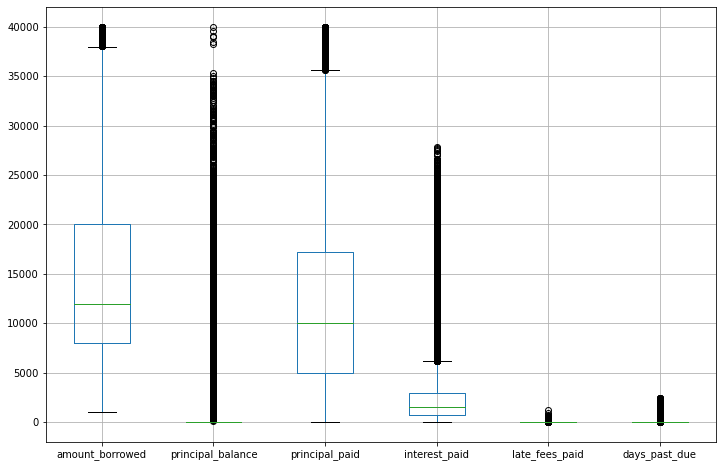

In [21]:
#boxplot for all the numerical variables
to_keep=['amount_borrowed','principal_balance', 'principal_paid','interest_paid', 'late_fees_paid','days_past_due']
df_keep=data[to_keep]
df_keep.columns.values
#boxplot of all the variables
plt.figure(figsize=(12, 8))
ax = df_keep.boxplot()

#### Domain based attribute reduction
Taking first stab at removing attributes that just arent useful for us

In [22]:
#del data['loan_number'] - keeping this for recommendation systems
del data['origination_date']
del data['last_payment_date']
del data['next_payment_due_date']
del data['data_source']

## Transformations for Modeling

### IntegerEncoding
Once the data has been imported and cleaned, we will work on transforming our dataset to be more useful for our classification models. To start we will first integerencode all of our categorical (object) datatypes as numbers.

In [23]:
def number_encode_features(df):
    result = data.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object or result.dtypes[column]==np.bool:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    print('Columns converted: '+str(encoders))
    return result

In [24]:
encoded_data = number_encode_features(data)
df = encoded_data.copy()
print('# of Records: '+str(len(df)))
print('# of Columns: '+str(df.shape[1]))

Columns converted: {'grade': LabelEncoder(), 'listing_title': LabelEncoder(), 'loan_status_description': LabelEncoder()}
# of Records: 1004083
# of Columns: 14


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004083 entries, 0 to 2013433
Data columns (total 14 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   loan_number                  1004083 non-null  int64  
 1   amount_borrowed              1004083 non-null  float64
 2   term                         1004083 non-null  int64  
 3   borrower_rate                1004083 non-null  float64
 4   installment                  1004083 non-null  float64
 5   grade                        1004083 non-null  int32  
 6   listing_title                1004083 non-null  int32  
 7   principal_balance            1004083 non-null  float64
 8   principal_paid               1004083 non-null  float64
 9   interest_paid                1004083 non-null  float64
 10  late_fees_paid               1004083 non-null  float64
 11  debt_sale_proceeds_received  1004083 non-null  float64
 12  days_past_due                1004083 non-n

### Correlation Matrix - Feature Reduction
Here correlation matrix visualizes the relationship within all of the variables in our dataset.
 * amount_borrowed           
 * term                       
 * **borrower_rate**: we will choose to include both borrower_rate and the grade despite the high correlation because though the Grade can depend on the rate, any changes to the rate does not result in immediate changes to the load grade.               
 * **installment**: we will remove this variable given the high correlation (corr=.97) between installment and and the amount borrowed.            
 * grade                         
 * listing_title               
 * principal_balance            
 * principal_paid               
 * interest_paid              
 * late_fees_paid             
 * debt_sale_proceeds_received  
 * days_past_due               
 * loan_status_description 

Looking at the heat map of the correlation matrix, we can see the closer to 1 or -1, the more correlated positively or negatively. <br>

The highly correlated variables are Borrower_rate and grade with 0.97, Installment is positively correlated with amount_borrowed and principal_paid respectively at 0.95 and 0.82.

Wall time: 785 ms


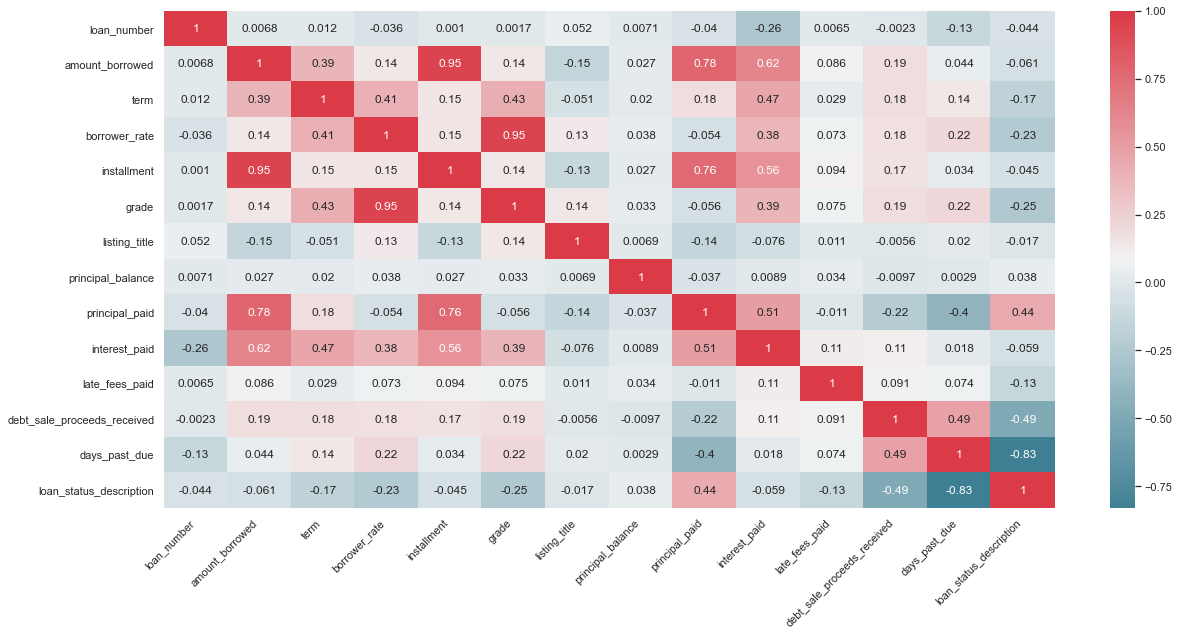

In [26]:
%%time
#Correlation check

import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# drop the counter attribute as that was used above when dealing with missing values
#del df['counter']

# show the heatmap
sns.set(style="darkgrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(18, 9))
chart=sns.heatmap(df.corr(), cmap=cmap, annot=True)
chart.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
f.tight_layout()

### Pair plots 

To better understand our dataset for potential clusters, we would like to 
use loan status description as the variable for groups, then pair plots below nine attributes to check the clustering across other attributes:

* amount_borrowed
* term
* borrower_rate
* installment
* principal_balance
* principal_paid
* interest_paid
* late_fees_paid
* days_past_due

Looking at the pair plots below, we can see some patterns in the two prominent colors. The plots indicate that we might get some clusters based on the density of some colors. For example, we can see large purple and light yellow color on the principlal_paid and interested_paid.
However, there are many noise dots and strong correlations as we're working on the large dataset. To simplify our dataset, we will look into PCA to reduce the redundant variables and noise.

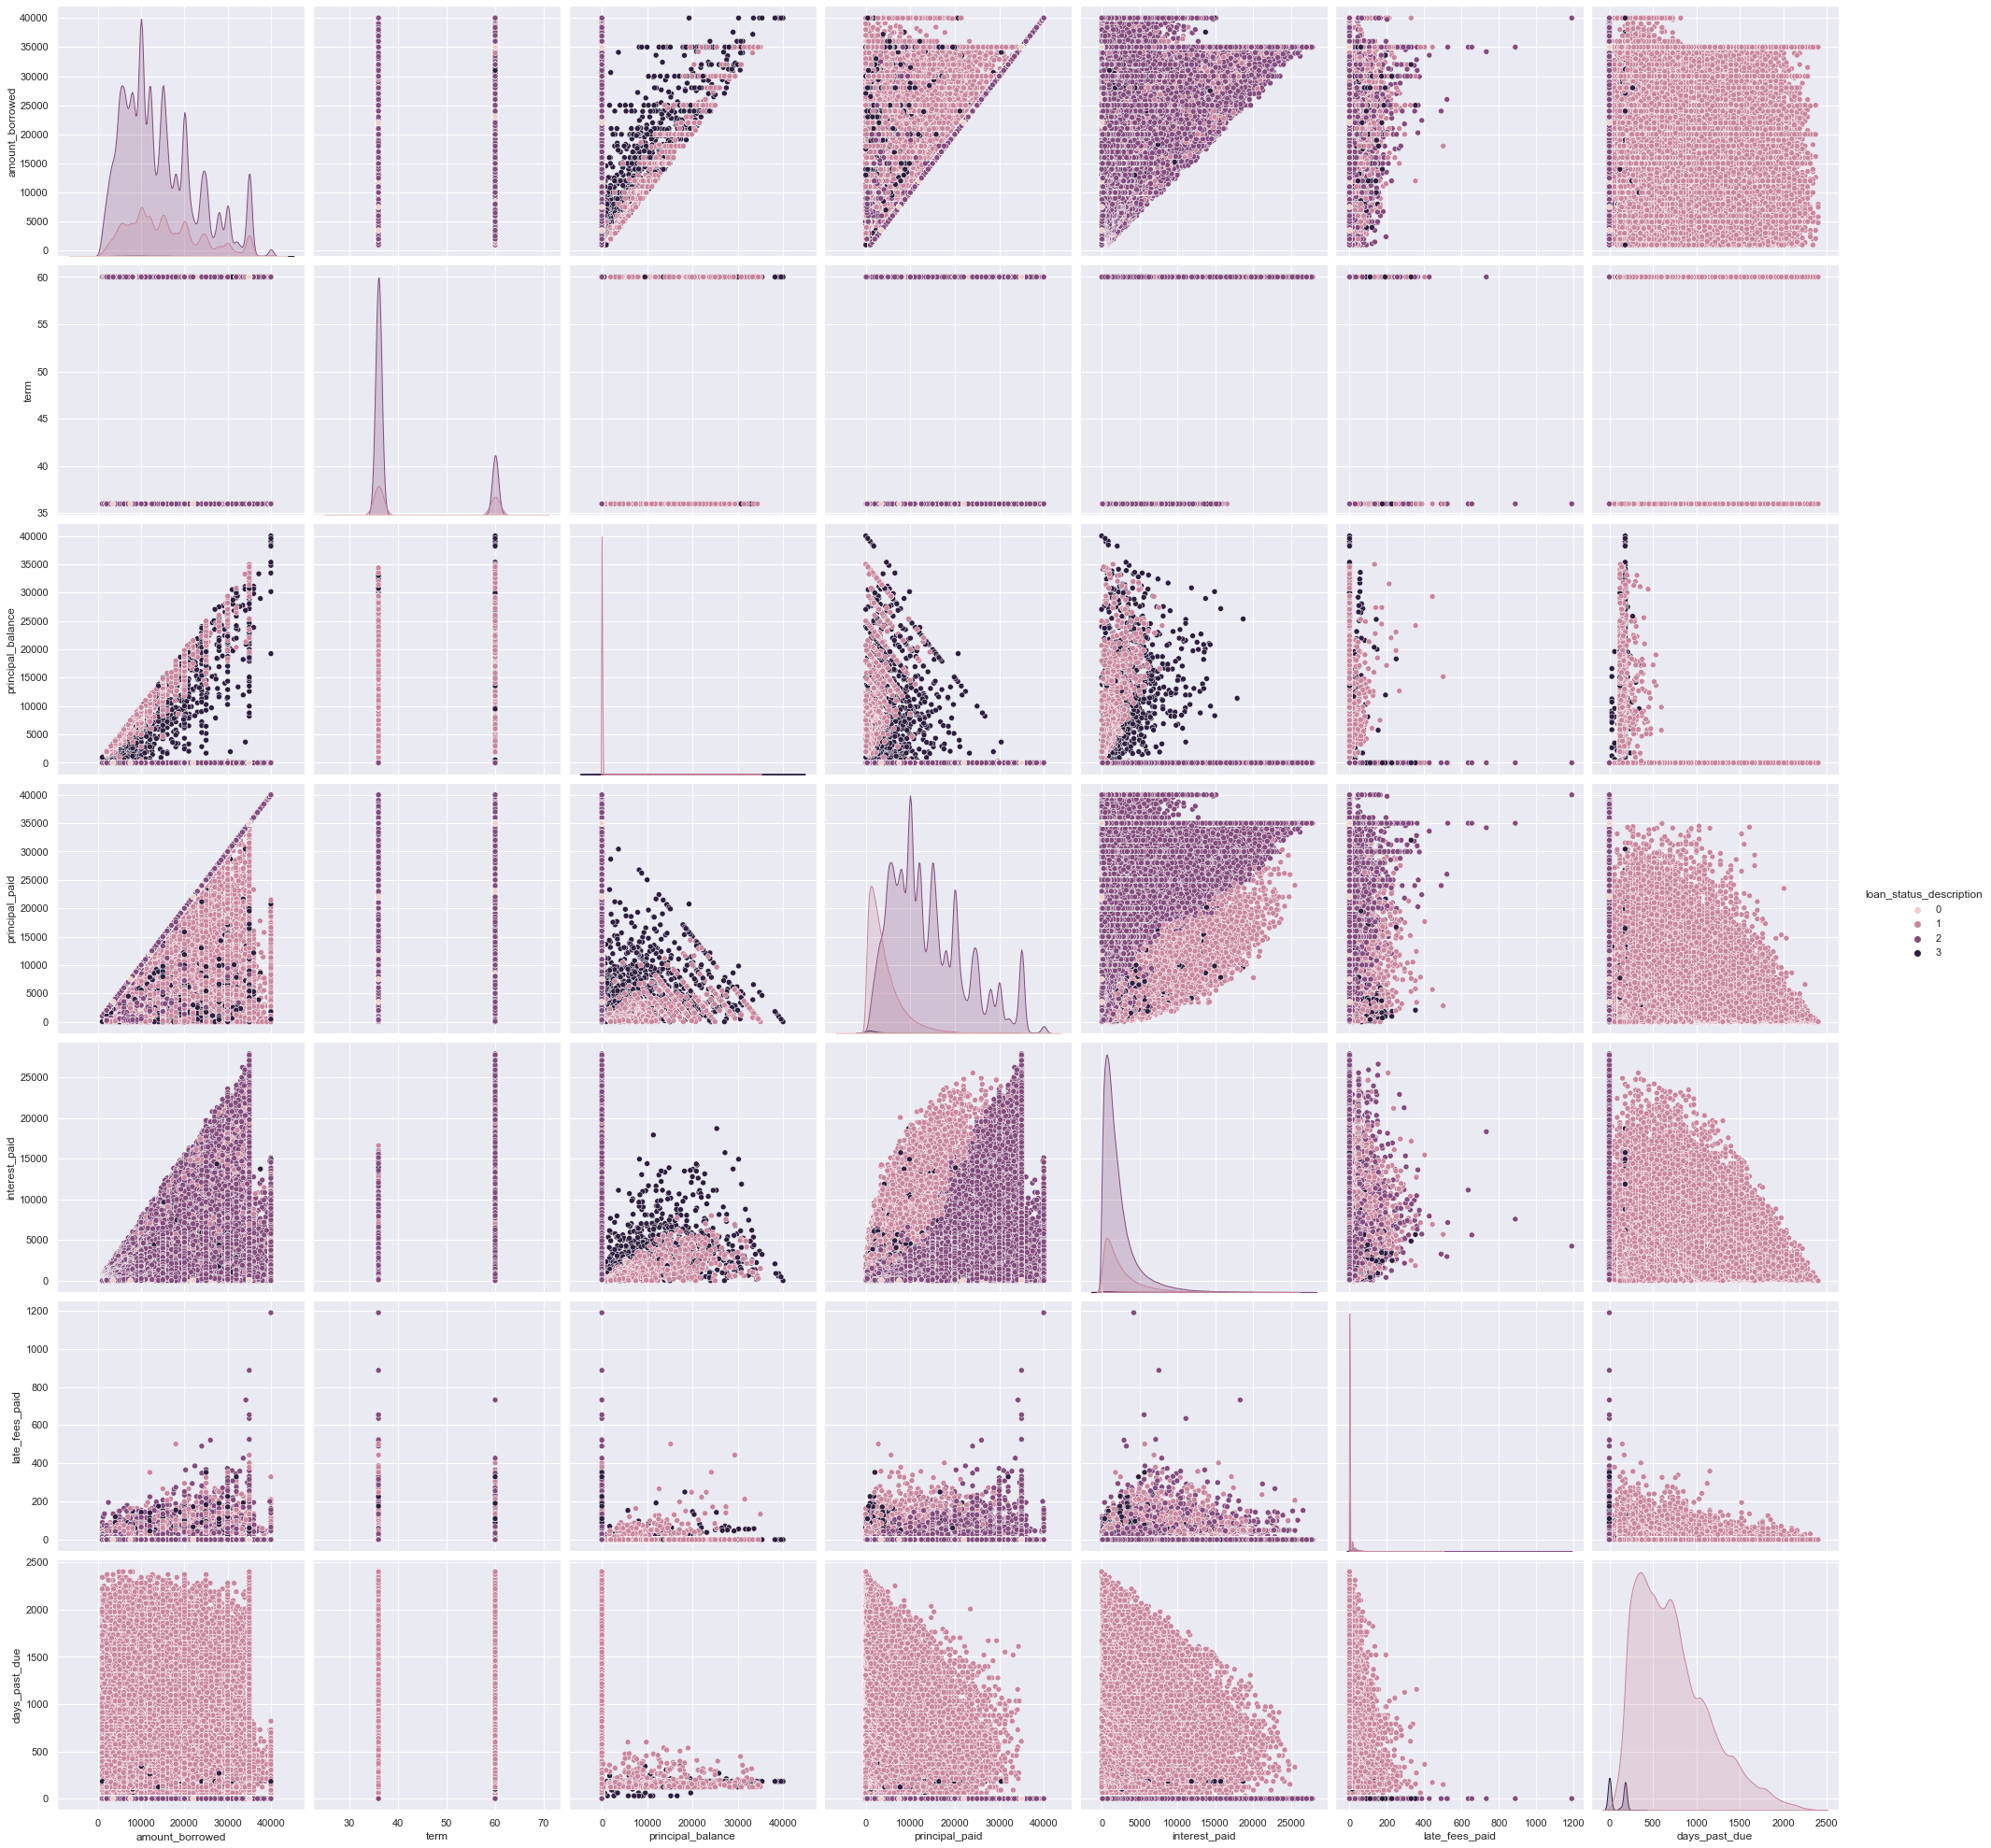

In [27]:
# Using loan status description as the variable for clusters, Pair plots all 9 attributes to check the clustering accross other attributes.
import seaborn as sns
sns.pairplot(df, height=4, hue= 'loan_status_description', vars = ['amount_borrowed', 'term','principal_balance', 'principal_paid','interest_paid', 'late_fees_paid','days_past_due'])

### OneHot Encoding
Once the data has been imported and cleaned, we will work on transforming our dataset to be more useful for our models models. To start we will first onehot encode all of our categorical (object) datatypes of interests on the following attributes:
* Grade
* listing_title
* term

In [92]:
# perform one-hot encoding of the categorical data "grade"
tmp_df = pd.get_dummies(df.grade,prefix='grade').astype(np.int)
df_imputed = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

In [29]:
# perform one-hot encoding of the categorical data "listing_title "
tmp_df1 = pd.get_dummies(df_imputed.listing_title ,prefix='listing_title')
df_imputed1 = pd.concat((df_imputed,tmp_df1),axis=1) # add back into the dataframe

In [30]:
# perform one-hot encoding of the categorical data "term "
tmp_df2 = pd.get_dummies(df_imputed1.term ,prefix='term')
df_final = pd.concat((df_imputed1,tmp_df2),axis=1) # add back into the dataframe

**creating a copy of our transformed dataset prior to removing the original attributes from the featureset**

In [31]:
df_cleaned = df_final.copy()

**cleaning up original attributes post-onehot encode**

In [91]:
# Now let's clean up the dataset
del_attributes = ('grade', 'term','listing_title','loan_number')

for i in del_attributes:
    if i in df_final:
        del df_final[i]

In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004083 entries, 0 to 2013433
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   amount_borrowed              1004083 non-null  float64
 1   borrower_rate                1004083 non-null  float64
 2   principal_balance            1004083 non-null  float64
 3   principal_paid               1004083 non-null  float64
 4   interest_paid                1004083 non-null  float64
 5   late_fees_paid               1004083 non-null  float64
 6   debt_sale_proceeds_received  1004083 non-null  float64
 7   days_past_due                1004083 non-null  int64  
 8   loan_status_description      1004083 non-null  int32  
 9   grade_0                      1004083 non-null  uint8  
 10  grade_1                      1004083 non-null  uint8  
 11  grade_2                      1004083 non-null  uint8  
 12  grade_3                      1004083 non-n

### Train / Test Split

In [34]:
if 'loan_status_description' in df_final:
    y = df_final['loan_status_description'].values # get the labels we want
    del df_final['loan_status_description'] # get rid of the class label
    X = df_final.values # use everything else to predict!

#### Undersampling
We can see that most loans are completed (1), so we will apply undersamplying to address the skew

<AxesSubplot:xlabel='loan_status_description', ylabel='count'>

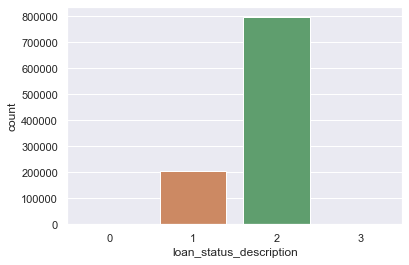

In [35]:
sns.countplot(x="loan_status_description", data=df_cleaned)

In [36]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

# define oversampling strategy
# undersample = RandomUnderSampler(sampling_strategy='majority')
undersample = NearMiss(version=1, n_neighbors_ver3=3)

Text(0.5, 0.98, "Undersampling 'Loan_Status_Description' using NearMiss-3")

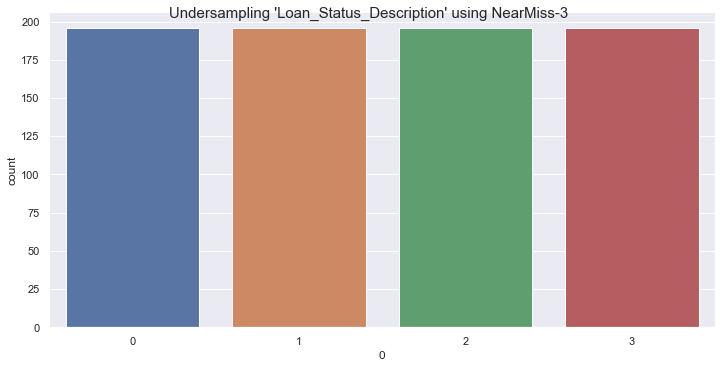

In [37]:
# fit and apply the transform
X_undersample, y_undersample= undersample.fit_resample(X, y)

#convert numpy array to dataframe to plot via sns
y_value_plot = pd.DataFrame(y_undersample)

undersample_plot = sns.catplot(x=0, kind="count",data=y_value_plot,height=5, aspect=2,legend=False)
undersample_plot.fig.suptitle("Undersampling 'Loan_Status_Description' using NearMiss-3",
                  fontsize=15, fontdict={"weight": "bold"})

In [38]:
from sklearn.model_selection import StratifiedKFold

num_cv_iterations = 3
num_instances = len(y_undersample)
cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

for train, test in cv.split(X_undersample,y_undersample):
    # note that these are sparse matrices
    X_train = X_undersample[train] 
    X_test  = X_undersample[test] 
    y_train = y_undersample[train]
    y_test  = y_undersample[test]

**it's very unfortunate that after undersampling we are left with a fraction of our original dataset (1m+ records). However, despite the small amount of data we have to train/test on, it is still the preferred approach only to be able to predict ANY 'default' loans given how small of of the total population it accounts for.**

In [39]:
print('X_train: '+str(len(X_train)))
print('y_train: '+str(len(y_train)))
print('='*80)
print('X_test: '+str(len(X_test)))
print('X_test: '+str(len(X_test)))

X_train: 706
y_train: 706
X_test: 78
X_test: 78


## -------------------- Data Understanding - 2 --------------------
[Back to Top](#---------------------Introduction---------------------)

To get a better understanding of our data and the feature importance each of attributes holds, we will run a quick Random Forest model on the 'load_status_description' to see the relationships (weights) each of our explanatory variables hold.

In [40]:
#deleting encoded values
print('df_final: ',df_final.columns)

df_final:  Index(['amount_borrowed', 'borrower_rate', 'principal_balance',
       'principal_paid', 'interest_paid', 'late_fees_paid',
       'debt_sale_proceeds_received', 'days_past_due', 'grade_0', 'grade_1',
       'grade_2', 'grade_3', 'grade_4', 'grade_5', 'grade_6',
       'listing_title_0', 'listing_title_1', 'listing_title_2',
       'listing_title_3', 'listing_title_4', 'listing_title_5',
       'listing_title_6', 'listing_title_7', 'listing_title_8',
       'listing_title_9', 'listing_title_10', 'listing_title_11',
       'listing_title_12', 'listing_title_13', 'term_36', 'term_60'],
      dtype='object')


### Feature Importance using Random Forest

In [41]:
%%time
clf_randomforrest = RandomForestClassifier(n_estimators=15, n_jobs=-1, oob_score=True)

for train, test in cv.split(X_train,y_train):
    clf_randomforrest.fit(X_train,y_train)
    yhat_randomforrest = clf_randomforrest.predict(X_train)
    
total_accuracy_randomforrest = mt.accuracy_score(y_train, yhat_randomforrest)

print ('Accuracy of "Load_Status"', total_accuracy_randomforrest)

Accuracy of "Load_Status" 0.9985835694050992
Wall time: 268 ms


#### Evaluating Feature Performance for 'Loan_Status'
We can see that in regards to the loan status of a borrower: the late_feeds_paid, interest_paid, listing_title all play a major role in final loan status of that borrower. We can deduce that often the behavior of customer payments is a somewhat good indicator of whether he/she will actually pay off the loan or not. 

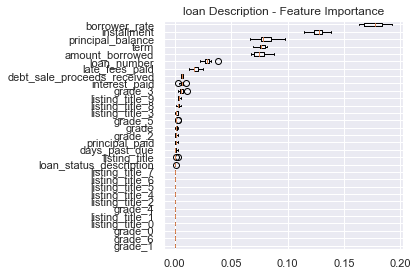

Wall time: 2.18 s


In [42]:
%%time
from sklearn.inspection import permutation_importance

feature_importance = clf_randomforrest.feature_importances_
random_forrest_result = permutation_importance(clf_randomforrest, X_train,y_train, n_repeats=10,
                                random_state=42, n_jobs=-1)

sorted_idx = random_forrest_result.importances_mean.argsort()
fig, ax = plt.subplots()
ax.boxplot(random_forrest_result.importances[sorted_idx].T,vert=False,labels=df_cleaned.columns[sorted_idx])
ax.set_title("loan Description - Feature Importance")
fig.tight_layout()
plt.show()

## -------------------- Modeling and Evaluation 1 --------------------
[Back to Top](#---------------------Introduction---------------------)

Training Models, Adjusting Parameters

### Model  1 - K-means Clustering
For this baseline procedure, we started to use the K-means cluster algorithm. We are looking at an elbow plot using the within-cluster sum of squares across the number of centroids (WCSS). Here, we saw a bit of an elbow at two centroids, suggesting that we might get the most efficiency out of two clusters. However, we will move forward with four as there are four different types of loan statuses we are classifying. 

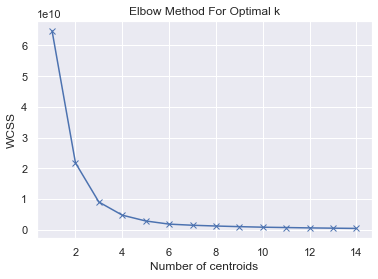

Wall time: 649 ms


In [43]:
%%time
#elbow method for optimal k
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

In [156]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_train)

#### Traditional Kmeans 
First, we would like to check how the clustering looks like using the training dataset X_train. Next, we process the original dataset using a PCA on the scaled dataset. Using the n_components parameter=20, compared to the actual variables, allows us to keep most of the original information with about .92 percent variation in data. 
PCA transforming on the scaled dataset helps us removing correlation and reducing redundant variables and their noise.

In [102]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca_train=PCA(n_components=20)
Cx_train=pca_train.fit_transform(scale(X_train))
Cx_test=pca_train.fit_transform(scale(X_test))
sum(pca_train.explained_variance_ratio_)
# run kmeans algorithm (this is the most traditional use of k-means)
kmeans = KMeans(init='random', # initialization
        n_clusters=2,  # number of clusters
        n_init=15,       # number of different times to run k-means
         random_state=1, n_jobs=-1)
kmeans.fit(Cx_train)

KMeans(init='random', n_clusters=2, n_init=15, n_jobs=-1, random_state=1)

#### MiniBatching K-means Clustering
We used the MiniBatching K-means cluster, the configuration 4 set for n_clusters, with batch size set to 10000. The plot includes 4 clusters that we set in our model. It also appears only one main cluster, with a few additional outliers located outside. We'll look into our silhouette score to evaluate these clusters.

Time for BatchKMeans:
Wall time: 26.2 ms
Time for MiniBatchKMeans:
Wall time: 106 ms


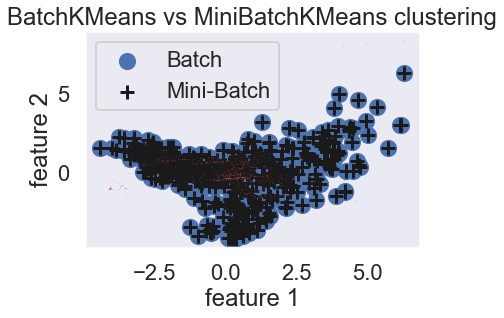

Batch objective function value: 14813.342557245172
Mini-Batch objective function value: 15086.741819276727
Wall time: 299 ms


In [106]:
%%time

from sklearn.cluster import MiniBatchKMeans

kmeans_mini = MiniBatchKMeans(n_clusters=4, batch_size=10000)
kmeans = KMeans(n_clusters=4)
X1=Cx_train
print('Time for BatchKMeans:')
%time kmeans.fit(X1)
print('Time for MiniBatchKMeans:')
%time kmeans_mini.fit(X1)

# visualize the data
centroids = kmeans.cluster_centers_
plt.plot(X1[:, 1], X1[:,-1], 'r.', markersize=0.2) #plot the data
plt.scatter(Cx_train[:, 0], Cx_train[:, 1],
            marker='o', s=200, linewidths=3, label='Batch')  # plot the centroids

centroids = kmeans_mini.cluster_centers_
plt.scatter(Cx_train[:, 0], Cx_train[:, 1],
            marker='+', s=200, linewidths=3, color='k',label='Mini-Batch')  # plot the centroids
plt.legend()
plt.title('BatchKMeans vs MiniBatchKMeans clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.grid()
plt.show()

print('Batch objective function value:', kmeans.inertia_)
print('Mini-Batch objective function value:', kmeans_mini.inertia_)

##### Visual basic clustering with 3D plot

Below we use a 3D plot to visualize our primary K-means clustering with PCA-transformed data appears in the Cx_train variable.We set up K-means with an init of random with two clusters to test against our PCA data frame. Then we set our X, Y, and Z as our three eigenvector features for the three-dimensional plot. The plot shows some separation, and we can see a few outliers in this 3D plot. However, you can still see some good clustering.

In [107]:
#PCA-transforme data
pcax = PCA(3)  
pcatrans = pcax.fit_transform(Cx_train)
pcax.explained_variance_ratio_

#converting our pca fit transformed array to pandas df
pca=pd.DataFrame(pcatrans)
pca.columns=['First Component','Second Component', 'Third Component']
#build our algorithm with k=2, train it on pca and make predictions

kmeans = KMeans(init='random', # initialization
        n_clusters=2,  # number of clusters
        n_init=15,       # number of different times to run k-means
         random_state=1,n_jobs=-1)
kmeans.fit(Cx_train)
newfeature = kmeans.labels_

centers = kmeans.cluster_centers_

Below chart gives us a 3D plot of the first,second, and third components derived from PCA. This shows some separation ,but we can still see some clustering in the 3D plot.

Text(0.5, 0.92, '3D plot for Clustering with basic Kmeans')

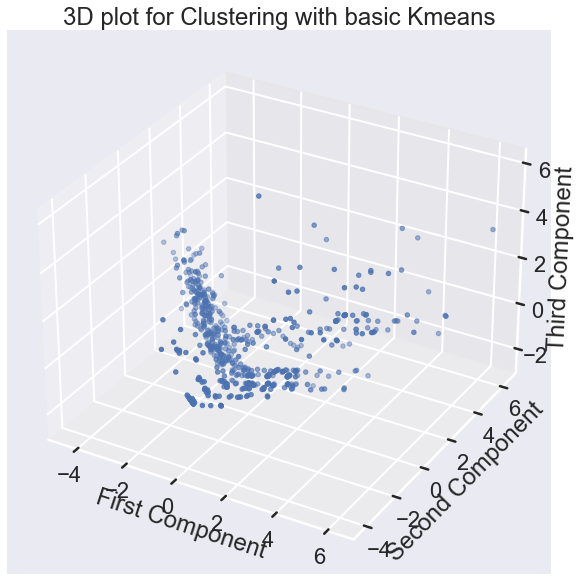

In [108]:
XP = pca['First Component']
YP = pca['Second Component'] 
ZP = pca['Third Component']

plt.rcParams["figure.figsize"] = (20,10)
ax = plt.axes(projection='3d')
ax.scatter(XP, YP, ZP, cmap='Accent', linewidth=1)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
plt.title('3D plot for Clustering with basic Kmeans')

### Model  2 - DBSCAN

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Building the clustering model
We chose DBSCAN model becuase we don't need to specify the number of clusters. We want to build the model and see if the number of the custers matched our previsou model. Based the previsou model (KNN mean), we estimated teh DBSCAN parameters eps= 0.3 and min_samples=10.

In [150]:
from sklearn.metrics import silhouette_score

label_DBSCAN = DBSCAN(eps=3, min_samples=10).fit(X_train_scaled)

#### Visualizing the clustering
The model has an estimated 14 clusters and recevied a silhouette coefficient score of 0.240. This indicates that the model we just build doens't have overlapping clusters. 

In [152]:
n_clusters_ = len(set(label_DBSCAN.labels_)) - (1 if -1 in label_DBSCAN.labels_ else 0)
n_noise_ = list(label_DBSCAN.labels_).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_train_scaled, label_DBSCAN.labels_))

Estimated number of clusters: 14
Estimated number of noise points: 205
Silhouette Coefficient: 0.240


### Model 3 - Agglomerative  clustering

In [53]:
## Normalizing the data for train and test
from sklearn.preprocessing import StandardScaler, normalize #for scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

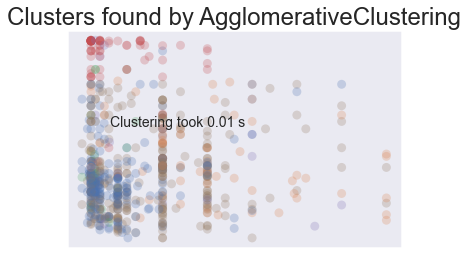

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}


# function plot_clusters is from https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html

def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    
plot_clusters(X_train_scaled, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

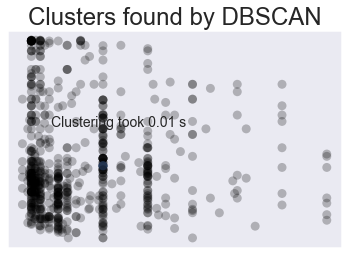

In [55]:
plot_clusters(X_train_scaled, cluster.DBSCAN, (), {'eps':0.025})

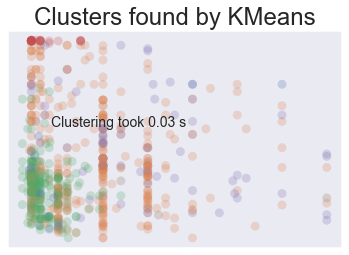

In [56]:
plot_clusters(X_train_scaled, cluster.KMeans, (), {'n_clusters':6})

### Model  4 - Gaussian Mixture Models
The plot is showing the clusters formed from the GMM model and these clusters are overlapped to a great extent. As a result, the model could not produce the needed accuracy we are looking for. One interesting point I have noted that GMM has produced a rectangular cluster which technically it should not generate 
given that the GMM model is meant for normal distribution, where the globular cluster is the natural outcome.

In [57]:
## Normalizing the data for train and test
from sklearn.preprocessing import StandardScaler, normalize #for scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [58]:
# We assume 3 different types of covariance matrix in the dataset and try to find which one performing better

import itertools
from scipy import linalg
from sklearn import mixture

X = X_train_scaled


lowest_bic = np.infty
bic = []
n_components_range = range(10, 20)
cv_types = ['spherical', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

best_gmm

GaussianMixture(covariance_type='diag', n_components=16)

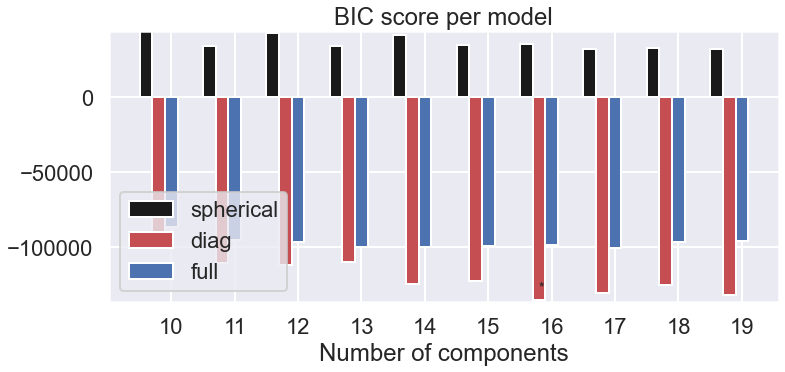

In [59]:
# plot the BIC
bic = np.array(bic)
color_iter = itertools.cycle(['k', 'r', 'b', 'g', 'c', 'm', 'y'])
clf = best_gmm
bars = []

plt.figure(figsize=(12,5))
spl = plt.subplot(1,1,1)
# Plot the BIC scores
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')

xpos = np.min(n_components_range)-0.4 + np.mod(bic.argmin(), len(n_components_range)) +\
       .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

plt.show()

The BIC plot shows that the diagonal covariance matarix has the lowest BIC with 18 components. So, we will use coveraince type diagonal and the number of components 18 in the gmm model

### Model 5 - Spectral Clustering

Wall time: 88.8 ms


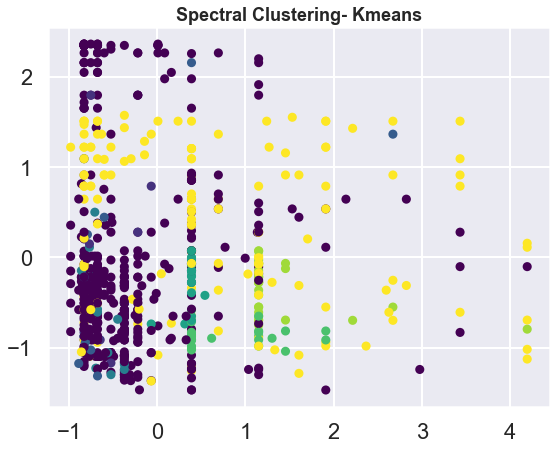

In [60]:
%%time
from sklearn.cluster import SpectralClustering

clf_spc = SpectralClustering(n_clusters=8, 
                             affinity = 'nearest_neighbors', 
                             eigen_solver='arpack',
                             assign_labels='kmeans')
##  Clustering using kmeans
labelsS = clf_spc.fit_predict(X_train_scaled)
cmap = 'viridis'
dot_size=50
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Spectral Clustering- Kmeans', fontsize=18, fontweight='demi')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=labelsS, s=dot_size, cmap=cmap)

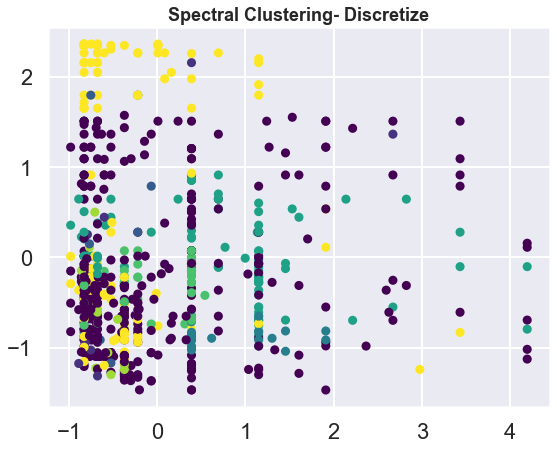

In [61]:
##  Clustering using discretize grouping

clf_spc1 = SpectralClustering(n_clusters=8, 
                             affinity = 'nearest_neighbors', 
                             eigen_solver='arpack',
                             assign_labels='discretize')
labelsS1 = clf_spc1.fit_predict(X_train_scaled)
cmap = 'viridis'
dot_size=50
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Spectral Clustering- Discretize', fontsize=18, fontweight='demi')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=labelsS1, s=dot_size, cmap=cmap)

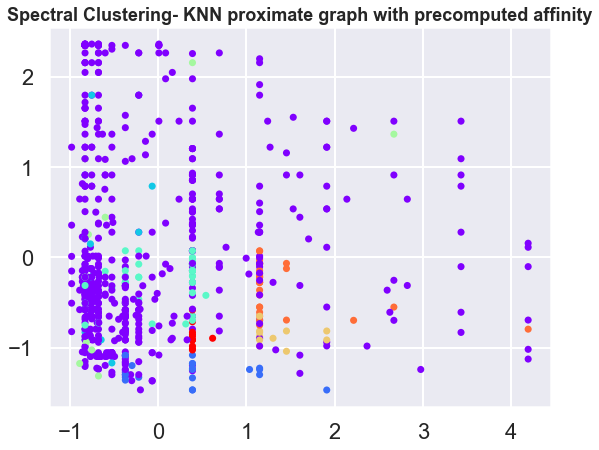

In [62]:
# using precomputed affinity, which uses the actual proximity graph
from sklearn.neighbors import kneighbors_graph

nclust = 8
Xknn = kneighbors_graph(X_train_scaled, 7) 

clf_spc2 = SpectralClustering(n_clusters=nclust, affinity = 'precomputed')
labelsS2 = clf_spc2.fit_predict(Xknn) 

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Spectral Clustering- KNN proximate graph with precomputed affinity', fontsize=18, fontweight='demi')
plt.scatter(X[:, 0], X[:, 1], c=labelsS2,
                    cmap=plt.cm.rainbow, s=50, linewidths=0)

plt.show()

In [63]:
# List of Silhouette Scores
from sklearn.metrics import silhouette_score
s_scores = []
  
# Evaluating the performance
s_scores.append(silhouette_score(X_train_scaled, labelsS))
s_scores.append(silhouette_score(X_train_scaled, labelsS1))
s_scores.append(silhouette_score(X_train_scaled, labelsS2))

print(s_scores)

[-0.10919536431119702, -0.0734897773234295, -0.11587532736398573]


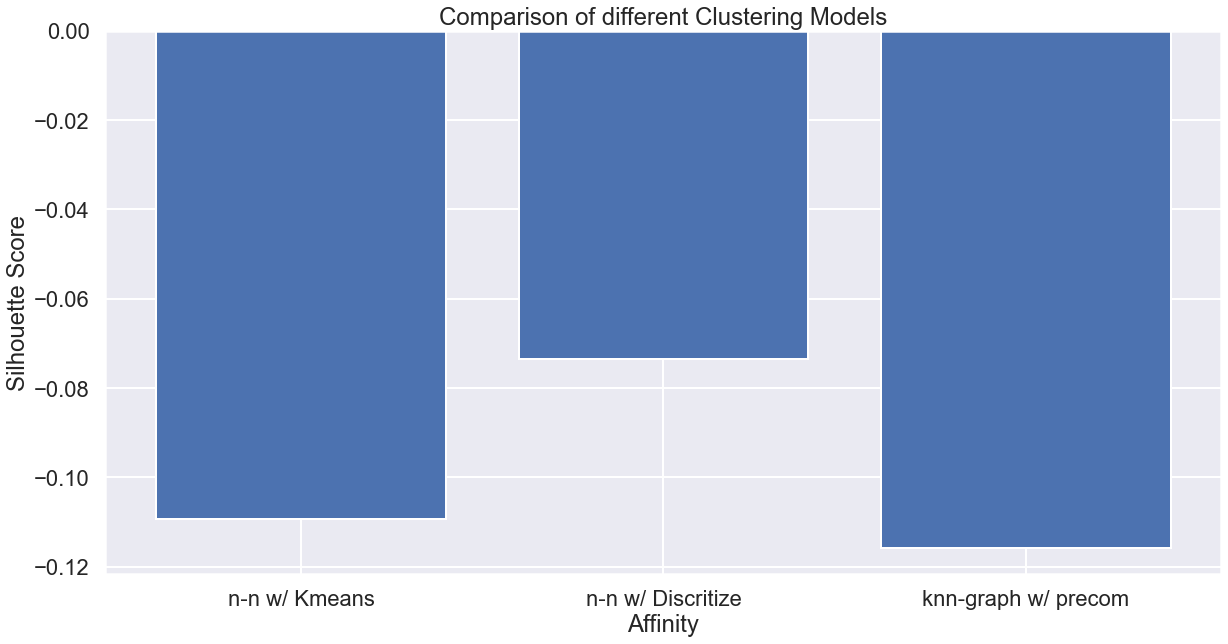

In [154]:
# Plotting a Bar Graph to compare the models

# List of different values of affinity
affinity = ['n-n w/ Kmeans', 'n-n w/ Discritize', 'knn-graph w/ precom']
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

All three models have similar Silhouette scores and all are negative, meaning there are overlaps in the clusters. However, looking at the plots of three model, we believe that "Discritize label assignment with nearest-neighbor affinity" has relatively less overlaps amoung the clusters. So, therefore, we will use this model to evaluate the accuracy. 

### Model 6 - Recommendation Systems w/Surprise Package
Loosely derived from this article: https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b

In [65]:
df_surprise = df.copy()
df_surprise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004083 entries, 0 to 2013433
Data columns (total 14 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   loan_number                  1004083 non-null  int64  
 1   amount_borrowed              1004083 non-null  float64
 2   term                         1004083 non-null  int64  
 3   borrower_rate                1004083 non-null  float64
 4   installment                  1004083 non-null  float64
 5   grade                        1004083 non-null  int32  
 6   listing_title                1004083 non-null  int32  
 7   principal_balance            1004083 non-null  float64
 8   principal_paid               1004083 non-null  float64
 9   interest_paid                1004083 non-null  float64
 10  late_fees_paid               1004083 non-null  float64
 11  debt_sale_proceeds_received  1004083 non-null  float64
 12  days_past_due                1004083 non-n

In [66]:
print(df['loan_status_description'].unique())
print(data['loan_status_description'].unique())
print(data['listing_title'].unique())

[2 1 3 0]
['COMPLETED' 'CHARGEOFF' 'DEFAULTED' 'CANCELLED']
['debt_consolidation' 'home_improvement' 'credit_card' 'other'
 'major_purchase' 'small_business' 'house' 'moving' 'medical' 'car'
 'vacation' 'renewable_energy' 'wedding' 'educational']


**changing the indexing of our loan_status_descriptions into a rating scale with 1 being the 'worse' thing a borrower can do to 4 being the best a borrower can do - paying off his/her loan.**
- 1 - 'DEFAULTED'
- 2 - 'CHARGEOFF'
- 3 - 'CANCELLED'
- 4 - 'COMPLETED'

In [67]:
df_surprise.loan_status_description.replace([0, 1, 2, 3], [3, 2, 1, 4], inplace=True)
print(df_surprise['loan_status_description'].unique())

[1 2 4 3]


#### Defining User and Ratings for recommendation system

In [68]:
surprise_col = ['loan_number', 'listing_title', 'loan_status_description'] 
df_surprise = df_surprise[surprise_col]
df_surprise.head()

loan_number  listing_title  loan_status_description
0     10149342              2                        1
1     10149488              4                        1
2     10148122              2                        1
3     10119623              2                        1
4     10159498              2                        1

In [69]:
#joining back the listing_title prior to integer encoding
list_info = data[['loan_number', 'listing_title']]
df_surprise = df_surprise.merge(list_info, left_on='loan_number',right_on='loan_number')
df_surprise.head()

loan_number  listing_title_x  loan_status_description     listing_title_y
0     10149342                2                        1  debt_consolidation
1     10149488                4                        1    home_improvement
2     10148122                2                        1  debt_consolidation
3     10119623                2                        1  debt_consolidation
4     10159498                2                        1  debt_consolidation

removing original attribute names and renaming

In [70]:
del df_surprise['listing_title_x']
df_surprise.head(1)

df_surprise = df_surprise.rename(columns={'listing_title_y': 'listing_title', 'loan_status_description': 'loan_status_rank'})
df_surprise.head()

loan_number  loan_status_rank       listing_title
0     10149342                 1  debt_consolidation
1     10149488                 1    home_improvement
2     10148122                 1  debt_consolidation
3     10119623                 1  debt_consolidation
4     10159498                 1  debt_consolidation

**converting df into matrix form for recommendation system**

In [71]:
from surprise import KNNWithMeans
from surprise import Reader, Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import PredefinedKFold

reader = Reader(rating_scale=(1, 4))
surprise_collab = Dataset.load_from_df(df_surprise[['loan_number', 'listing_title', 'loan_status_rank']], reader)

#### Building Simple Collborative Filtering Model using Matrix-Factorization SVD

In [72]:
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

#surprise algos
from surprise import NormalPredictor
from surprise import BaselineOnly
#k-NN inspired algos
# from surprise import KNNBasic - doesn't run
# from surprise import KNNWithMeans - doesn't run
# from surprise import KNNWithZScore - doesn't run
# from surprise import KNNBaseline - doesn't run
from surprise import SVD
from surprise import AlgoBase
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

#surprise metrics
from surprise.accuracy import rmse
from surprise import accuracy

In [73]:
%%time
trainset, testset = train_test_split(surprise_collab, test_size=0.25)
algo = SVD(verbose=False)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.4280
Wall time: 34.4 s


0.4280020238435844

**subsetting size of the user matrix**

When running the algo.pu model which provides all User factors, due to the sheer volume of "users" we have, this model takes an extremely long time so in order to get a "big picture" of it. We will subset 5000 rows from the array.

In [74]:
user_algo = algo.pu[0:5000, :]

#### Performing Exhaustive Search

In [75]:
%%time
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, surprise_collab, measures=['RMSE'], cv=3, verbose=False,n_jobs=-1)
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Wall time: 4min 8s


In [76]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results

test_rmse   fit_time  test_time
Algorithm                                       
BaselineOnly      0.428015   1.122647   1.508951
SVDpp             0.428320  45.164536   1.538539
SVD               0.428585  26.251106   1.474721
CoClustering      0.428628  48.305776   1.306173
SlopeOne          0.428629   4.436770   1.610042
NMF               0.428629  51.901183   1.571467
NormalPredictor   0.540933   0.639289   1.999338

**GridSearchCV on Best(BaselineOnly) ExhaustiveSearch Model**

After finding the most optimal model using an exhaustive search method. We next use GridSearchCV with 2 different bias estimates: 'als' (Alternating Least Squares) and 'sgd' (Stochastic Gradient Descent) to output the most optimal BaselineOnly model. 

Based on the output of the GridSearchCV RMSE, we can see that it matches the model's default estimator of 'als'. 

In [77]:
%%time
from surprise.model_selection import GridSearchCV

#set algo params
param_grid={'bsl_options': {'method':['als', 'sgd']}}
#create GridSearchCV
gs = GridSearchCV(BaselineOnly, param_grid, measures=['rmse', 'mae'], cv=3,joblib_verbose =0,refit=True) #note refit has to be true in order to use test() function
#fit algo
gs.fit(surprise_collab)
#predict algo
predictions = gs.test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using als...
RMSE: 0.4010
Wall time: 38.2 s


0.40098240461527174

**Viewing prediction results of Collaborative Filter System Model**

In [78]:
df_pred_results = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_pred_results = df_pred_results.rename(columns={'uid': 'loan_number', 'iid': 'loan_title', 'rui': 'loan_status_true', 'est': 'loan_status_est'})
df_pred_results['loan_status_est_round'] = round(df_pred_results['loan_status_est'])
df_pred_results

loan_number          loan_title  loan_status_true  loan_status_est  \
0           8578815         credit_card               1.0         1.167472   
1           1583524         credit_card               1.0         1.167472   
2          54099851  debt_consolidation               1.0         1.209596   
3          83778824  debt_consolidation               1.0         1.209596   
4          68494747  debt_consolidation               1.0         1.209596   
...             ...                 ...               ...              ...   
251016     78961507  debt_consolidation               2.0         1.272096   
251017     53814473  debt_consolidation               1.0         1.209596   
251018      5884803  debt_consolidation               1.0         1.209596   
251019     43276883         credit_card               1.0         1.167472   
251020     59471730      major_purchase               1.0         1.185005   

                          details  loan_status_est_round  
0       {'was_impossible': False}                    1.0  
1       {'was_impossible': False}                    1.0  
2       {'was_impossible': False}                    1.0  
3       {'was_impossible': False}                    1.0  
4       {'was_impossible': False}                    1.0  
...                           ...                    ...  
251016  {'was_impossible': False}                    1.0  
251017  {'was_impossible': False}                    1.0  
251018  {'was_impossible': False}                    1.0  
251019  {'was_impossible': False}                    1.0  
251020  {'was_impossible': False}                    1.0  

[251021 rows x 6 columns]

## -------------------- Modeling and Evaluation 2 - Evaluation --------------------
[Back to Top](#---------------------Introduction---------------------)


Evaluate and Compare

### Model  1 - K-means Clustering

**kmeans - performance metrics**

In [126]:
%%time

for train, test in cv.split(Cx_train,y_train):
    kmeans.fit(Cx_train,y_train)
    yhat_kmeans = kmeans.predict(Cx_test)
    
total_accuracy_kmeans = mt.accuracy_score(y_test, yhat_kmeans )

print ('Accuracy of "K-means Clustering"', total_accuracy_kmeans)

Accuracy of "K-means Clustering" 0.5
Wall time: 158 ms


In [127]:
# Silhouette Scores
from sklearn.metrics import silhouette_score

label_kmeans = kmeans.fit_predict(Cx_train)

# Evaluating the performance
Sil_Scores_kmeans = silhouette_score(Cx_train, label_kmeans)
print("Silhoutte Scores of K-means Clustering:", Sil_Scores_kmeans)

Silhoutte Scores of K-means Clustering: 0.14317556854408983


### Model 2 - DBSCAN

In [153]:
# Silhouette Scores
from sklearn.metrics import silhouette_score

label_DBSCAN = DBSCAN(eps=3, min_samples=10).fit(X_train_scaled)
label_DBSCAN.labels_
# Evaluating the performance
Sil_Scores_DBSCAN = silhouette_score(X_train_scaled, label_DBSCAN.labels_)
print("Silhoutte Scores of DBSCAN :", Sil_Scores_DBSCAN)

Silhoutte Scores of DBSCAN : 0.23958923164259063


### Model 3 - Agglomerative  Clustering

In [83]:
# Silhouette Scores
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

label_AgglomerativeClustering = AgglomerativeClustering().fit(X_train_scaled)
label_AgglomerativeClustering.labels_
# # Evaluating the performance
Sil_Scores_AgglomerativeClusterin= silhouette_score(X_train_scaled, label_AgglomerativeClustering.labels_)
print("Silhoutte Scores of  Agglomerative Clustering :", Sil_Scores_AgglomerativeClusterin)

Silhoutte Scores of GMM model : 0.18232898972038245


### Model  4 - Gaussian Mixture Models

In [84]:
%%time
clf_gmm = mixture.GaussianMixture(n_components=18, covariance_type='diag')

for train, test in cv.split(X_train_scaled,y_train):
    clf_gmm.fit(X_train_scaled,y_train)
    yhat_gmm = clf_gmm.predict(X_test_scaled)
    
total_accuracy_gmm = mt.accuracy_score(y_test, yhat_gmm)

print ('Accuracy of "Gaussian Mixture"', total_accuracy_gmm)

Accuracy of "Gaussian Mixture" 0.10256410256410256
Wall time: 169 ms


In [85]:
# Silhouette Scores
from sklearn.metrics import silhouette_score

labelgmm = clf_gmm.fit_predict(X_train_scaled)

# Evaluating the performance
Sil_Scores_gmm = silhouette_score(X_train_scaled, labelgmm)
print("Silhoutte Scores of GMM model :", Sil_Scores_gmm)

Silhoutte Scores of GMM model : 0.293269623096648


### Model 5 - Spectral Clustering

In [86]:
for train, test in cv.split(X_train_scaled,y_train):
    clf_spc1.fit(X_train_scaled,y_train)
    yhat_clf = clf_spc1.fit_predict(X_test_scaled)
    
total_accuracy_clf_Spec = mt.accuracy_score(y_test, yhat_clf)

print ('Accuracy of "Spectral Clustering"', total_accuracy_clf_Spec)

Accuracy of "Spectral Clustering" 0.11538461538461539


### Model 6 - Recommendation Systems w/Surprise Package

In [130]:
df_pred_results['pred_diff'] = df_pred_results['loan_status_true'] != df_pred_results['loan_status_est_round']
len(df_pred_results['loan_status_true'] != df_pred_results['loan_status_est_round'])

#manually calculating Accuracy = (TP + TN / TP + TN + FP + FN)
accuracy = len(df_pred_results[df_pred_results['pred_diff']==False])/len(df_pred_results)
print('Total Accuracy: '+str(accuracy))

Total Accuracy: 0.7939813800439007


## -------------------- Modeling and Evaluation 3 - Visuals --------------------
[Back to Top](#---------------------Introduction---------------------)

Visualize Results

### Model  1 - K-means Clustering
We used the K-means cluster, the configuration 4 setup for K-means, with n_init set to 15 and n_job set to -1. The plot includes numbers for each of the 4 clusters we set in our model. It appears one main cluster, with a few additional outliers located outside. We'll look into our silhouette score to evaluate these clusters.


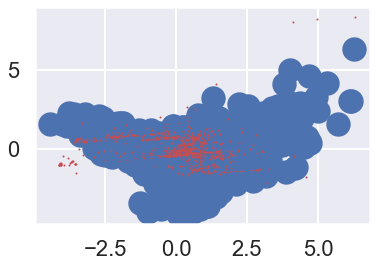

In [88]:
from sklearn.cluster import KMeans
# run kmeans algorithm (this is the most traditional use of k-means)
kmeans = KMeans(init='random', # initialization
        n_clusters=2,  # number of clusters
                random_state=1,
        n_init=15,       # number of different times to run k-means
        n_jobs=-1)
kmeans.fit(Cx_train)
# visualize the data
centroids = kmeans.cluster_centers_
plt.plot(Cx_train[:, 1], Cx_train[:, -1], 'r.', markersize=2) #plot the data
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='+', s=200, linewidths=3, color='k')  # plot the centroids
plt.scatter(Cx_train[:,0], Cx_train[:,1], s=500)
plt.show()

### Model 2 - DBSCAN
Now let's print the mdoel's level. Here's cluster genersted by the model. 

All the data points are now of different shade of grey color. It is because the value of epsilon is very small and we didn’t optimize parameters. Therefore, we need to find the value of epsilon and minPoints and then train our model again.

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 0.035 in this case. The value of minPoints also depends on domain knowledge. Here's we are taking minPoints as 6.

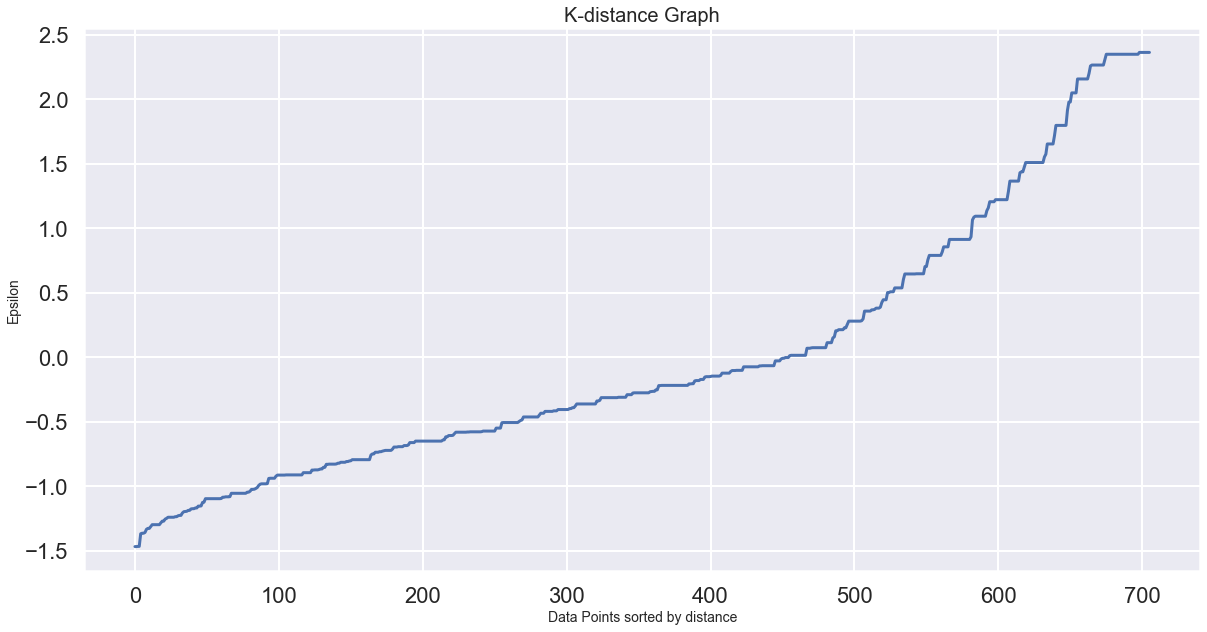

In [97]:
# Plotting K-distance Graph
distances = np.sort(X_train_scaled, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

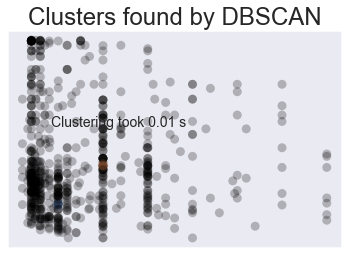

In [98]:
plot_clusters(X_train_scaled, cluster.DBSCAN, (), {'eps':0.038})

### Model 3 - Agglomerative clustering
Here, we use method "ward" to create agglomerative clustering, this is similar to the k-means as it minimizes the sum of squared differences within all clusters but using a hierarchical approach.

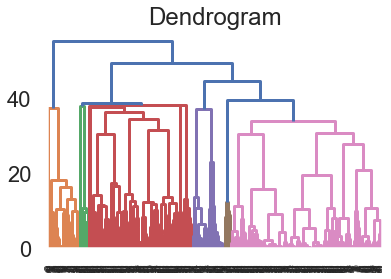

<Figure size 720x720 with 0 Axes>

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X_train_scaled, method  = "ward"))
plt.title('Dendrogram')
plt.figure(figsize=(10, 10)) 
plt.show()

### Model 4 - Gaussian Mixture Models
The plot is showing the clusters formed 
from GMM model.

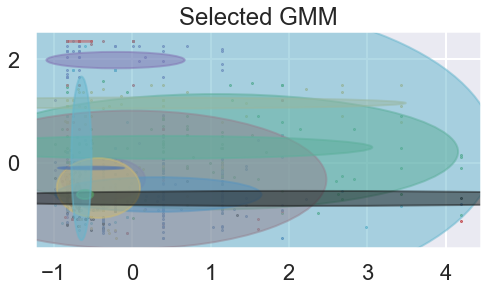

In [100]:
# Plot 
import matplotlib as mpl
plt.figure(figsize=(8,4))
splot = plt.subplot(1,1,1)
Y_ = clf.predict(X)
for i, (mean, covar, color) in enumerate(zip(clf.means_, clf.covariances_,
                                             color_iter)):
    if len(covar.shape)<2:
        tmp = np.zeros((2,2))
        np.fill_diagonal(tmp,covar)
        covar = tmp
    elif covar.shape[0] != covar.shape[1]:
        covar = np.diag(covar)
        
    v, w = linalg.eigh(covar)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180 * angle / np.pi  # convert to degrees
    v *= 4
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)


plt.title('Selected GMM')
plt.show()

### Model 5 - Spectral Clustering
The spectral clusters are sparse in some cases and dense in others, and the spectral model is good in handling it. But the problem is the clusters are overlapping, thereby making it difficult to isolate one cluster from others. As a result, the silhouette score is low for this cluster. 

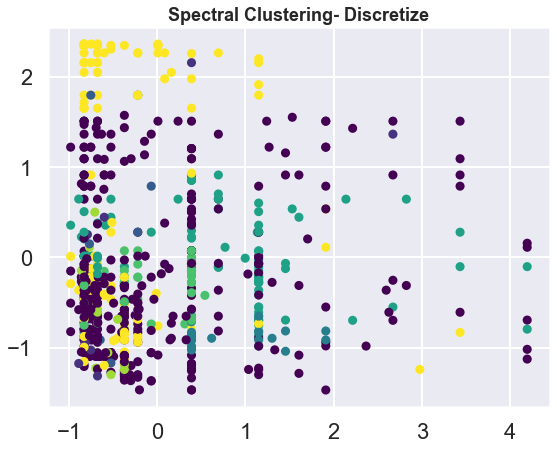

In [101]:
cmap = 'viridis'
dot_size=50
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Spectral Clustering- Discretize', fontsize=18, fontweight='demi')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=labelsS1, s=dot_size, cmap=cmap)

### Model 6 - Collaborative Filtering w/Surprise using t-SNE
Code borrowed from: https://towardsdatascience.com/how-you-can-build-simple-recommender-systems-with-surprise-b0d32a8e4802

The idea here is to utilize the SVD matrix Factorization-based algorithms in our recommendation system to visualize the similarity of our item factors, in this case, the similarity of our loan listing. To do this, the **t-distributed Stochastic Neighbor Embedding** is used that essentially visualize high-dimensional data by represting our collaborative filtering SVD matrix into a two-dimensional plane using the default euclidean distance metric. 

Loan Listings: {'debt_consolidation' 'home_improvement' 'credit_card' 'other'
 'major_purchase' 'small_business' 'house' 'moving' 'medical' 'car'
 'vacation' 'renewable_energy' 'wedding' 'educational'}

to start, let's visualize the estimated Loan rankings, our in our terms, the most likely loan_status of the user based on user patterns and similarities. We can see immediately that all of the rankings are <2 which would classify it as a "COMPLETED" loan. This isn't very useful but can be explained by how similar the estimates are to the distribution of the original 'loan_status_description' which shows that even in a Collaborative Filtering scenario, class imbalance still plays a huge effect in overall model accuracy.

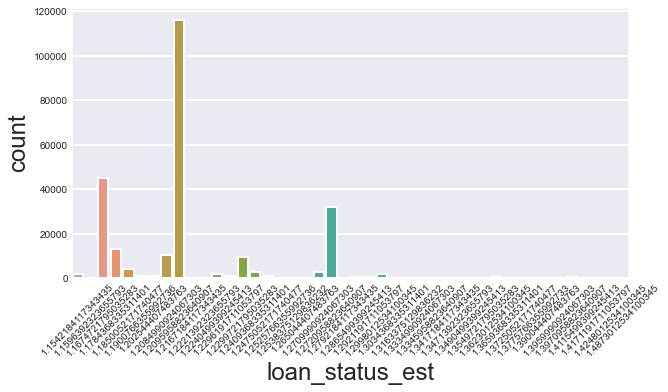

In [109]:
# set the figure size
plt.figure(figsize=(10,5))
ax = sns.countplot(x="loan_status_est", data=df_pred_results)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.tick_params(axis='both', labelsize=10, length = 0)

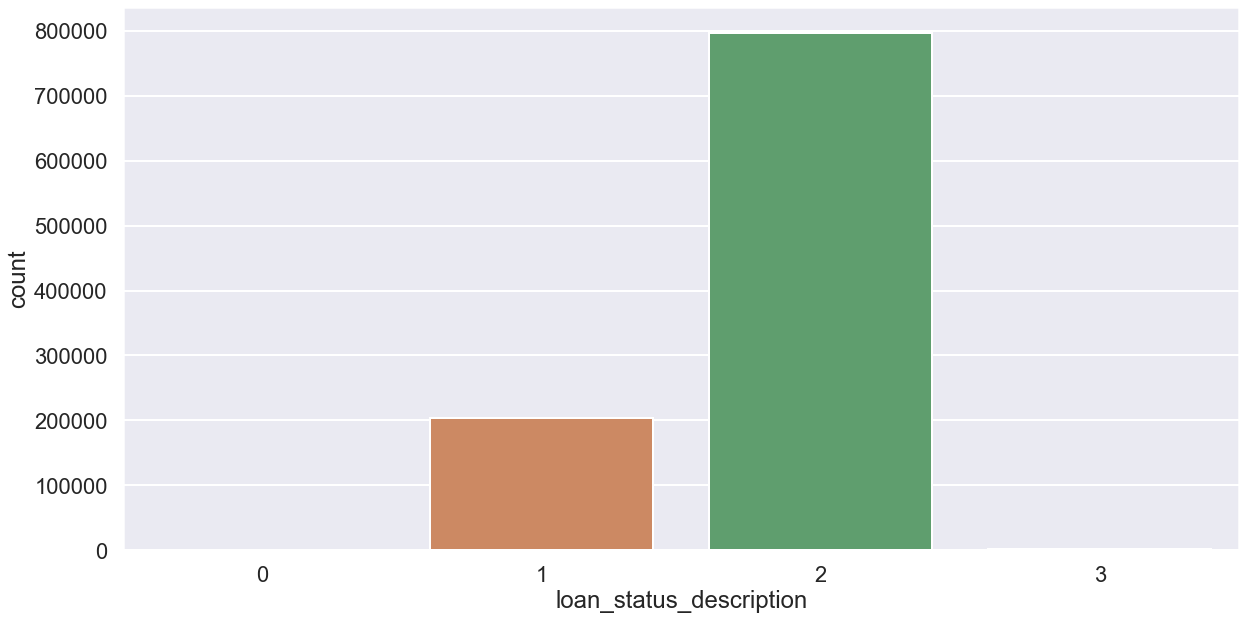

In [110]:
og= sns.countplot(x="loan_status_description", data=df)

**transforming SVD matrix into 2D dataframe**

In [111]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, metric='euclidean', n_iter=500, verbose=1, random_state=42,n_jobs=-1)

#user_algo = algo.pu (user factors)
user_embedded_df = tsne.fit_transform(user_algo)
user_projection = pd.DataFrame(columns=['x', 'y'], data=user_embedded_df)
print(user_projection.head(5))
print('='*80)
#item factors
item_embedded_df = tsne.fit_transform(algo.qi)
item_projection = pd.DataFrame(columns=['x', 'y'], data=item_embedded_df)
print(item_projection.head(5))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.001s...
[t-SNE] Computed neighbors for 5000 samples in 0.553s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.241139
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.844299
[t-SNE] KL divergence after 500 iterations: 4.288678
          x         y
0  3.387579 -1.869854
1 -0.663870  2.931435
2 -1.152917 -1.164518
3 -1.074526  2.376528
4  1.572351 -4.727736
[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 14 samples in 0.000s...
[t-SNE] Computed neighbors for 14 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 14 / 14
[t-SNE] Mean sigma: 1125899906842624.0

We can see that there is not a whole lot of similarity between each of the loan_listings since there is a distinct lack of clusters and that each of the 14 loan_listing are quite far each other in terms of it's similarity distances. 

Text(0.5, 1.0, 'Loan Listing Similarity Matrix')

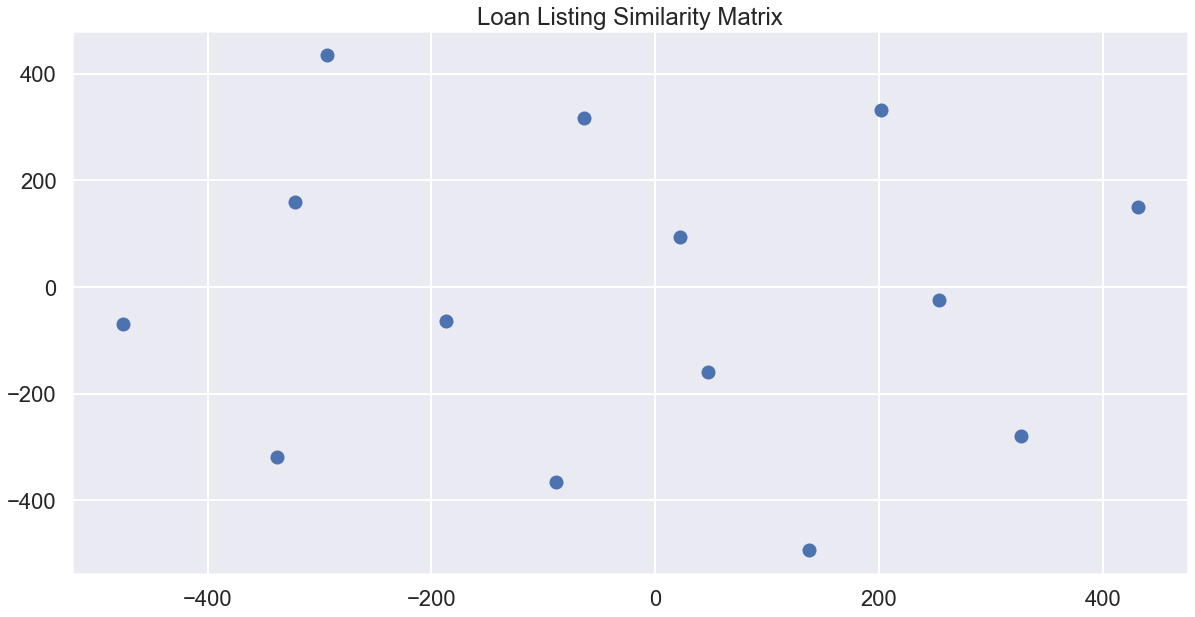

In [112]:
plt.scatter(item_projection.x, item_projection.y)
plt.title('Loan Listing Similarity Matrix')

When visualizing the similarity of the users (lender), we can see that most lenders follow a 2d normal distrubtion where the majority of users fall under a "similar" characteristics based on the latent factors of the lender's item (listing types). 

Text(0.5, 1.0, 'Loan Lender - Similarity Matrix')

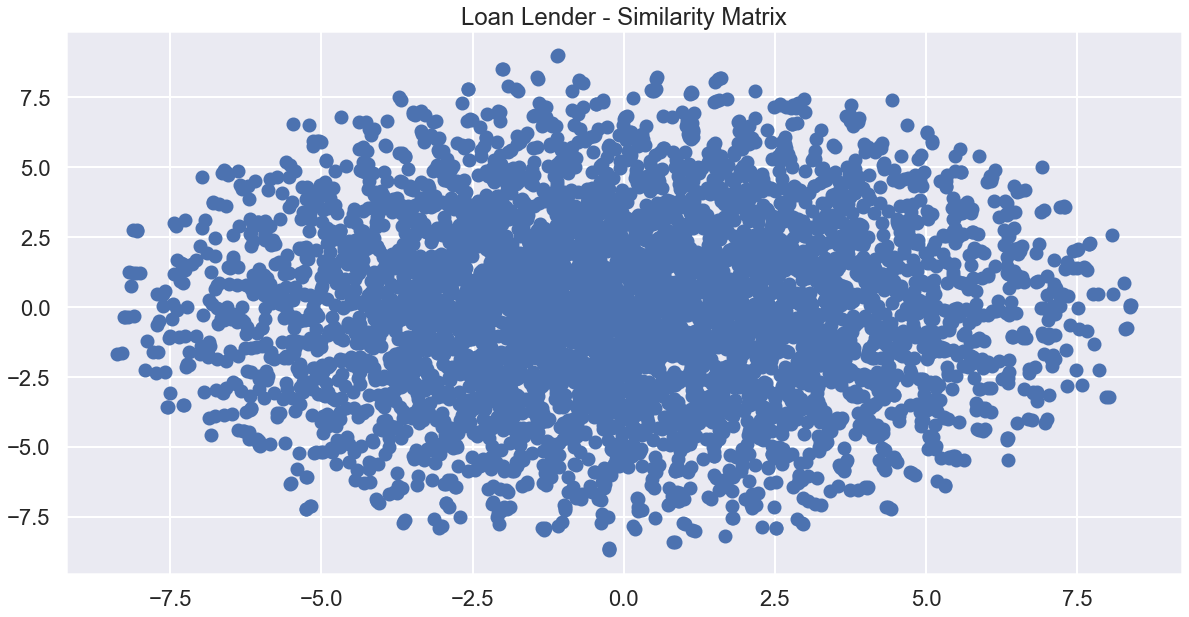

In [113]:
plt.scatter(user_projection.x, user_projection.y)
plt.title('Loan Lender - Similarity Matrix')

## -------------------- Modeling and Evaluation 4 - Summary --------------------
[Back to Top](#---------------------Introduction---------------------)

Summarize the Ramifications

To summarize all of  clustering performance, please check below information for the top silhouette score for each clustering algorithm that we ran. 
* Best model  - **Gaussian Mixture Models**, Silhouette Score = 0.2933
* Second best model  - **Kmeans**, Silhouette Score = 0.261
* Third best model  - **DBSCAN**, Silhouette Score = 0.2396

In [146]:
import pandas as pd
sil_list =[]
sil_list.append(("Kmeans", "traindata", "0.261"))
sil_list.append(("MiniBatch_Kmeans", "traindata", "0.222"))
sil_list.append(("DBSCAN", "traindata", "0.2396"))
sil_list.append(("Agglomerative Clustering", "traindata", "0.1823"))
sil_list.append(("Gaussian Mixture Models", "traindata", "0.2933"))
sil_list.append(("Spectral Clustering", "traindata", "0.1154"))

score_list = pd.DataFrame(sil_list, columns = ['Algorithm', 'Dataset', "Silhouette Score"])
score_list.sort_values(by=['Silhouette Score'], ascending=False)

Algorithm    Dataset Silhouette Score
4   Gaussian Mixture Models  traindata           0.2933
0                    Kmeans  traindata            0.261
2                    DBSCAN  traindata           0.2396
1          MiniBatch_Kmeans  traindata            0.222
3  Agglomerative Clustering  traindata           0.1823
5       Spectral Clustering  traindata           0.1154

### <u>Kmeans Clustering: </u>

**Advantage:** 
* Simplicity, speed, and scalability to large data points
* Summarize relevant features
* Generalize all the items in a class 
* Adapts to new examples easily

**Disadvantage:**
* Find the optimal K manually, challenging to predict the K value
* Centroids can be affected by outliers and noisy data, and the iterative process shift the centroid position toward the areas where most data points gravitate
* The Euclidean distance
* Sensitive to scale and lack of consistency


### <u>DBScan: </u>
**Advantage**: 
* No need to specify number of clusters
* It can find arbitrarily-sahped clusters
* It's robust to outliers (noise)
* Mostly insensitive to ordering of points in database

**Disadvantage**:
* Need understanding of data to choose Eps and minpts
* Not entirely determinstirc
* Does work well on clusters having large difference in densities


###  <u>Agglomerative Clustering:</u>
**Advantage**: 
* easy to implement

**Disadvantage**:
* not suitable for large datasets
* very sensitive to outliers

### <u>GMM: </u>
**Advantage: (it answers why we selected this model)**
* It is robust to density difference because it can handle sparse and dense clusters. In our case, we may have the presence of both because the completed status will have a dense and wide cluster, whereas the default may have a sparse cluster.
* It can be more generalized than other cluster types because of its inherent assumption that the observations are independent.

**Disadvantage: (in relation to the data – why failed give good accuracy)**
* It does not scale up for a large dataset, which can be a concern as the lending will grow.
* It can only handle globular clusters (center based), which may not be the case for the short-term lending dataset. In fact, this property has not prevailed well on this dataset and the model does not yield good accuracy. 
 
### <u> Spectral Analysis: </u>
**Advantage**:
We used a shared nearest neighbor similarity approach, which works well for a low dimension dataset that we have. Secondly, we can see that loans have a typical pattern based on the type of lending, meaning a car or wedding loan stays within a certain range and oscillates around the same parameters. Since we are using mostly numerical parameters, all distance matrices will work well including Euclidean and Cosine. Spectral clustering is good in dealing with sparse data (late fees) because the variable carrying lesser information will rank below in the eigenvalue, thereby eliminating any linear combination (eigenvector) contributing to the model identification.

**Disadvantage:**
With the higher level of clusters, the model tends to overlap; thereby reducing the value of the prediction.


###  <u>Collaborative Filtering using Surprise SciKit:</u>
**Advantage**: 
* Since Collaborative Filtering is a Unsupervised model, it doesn't require "true" values like in classification or regression models and can accuractely recommend items without knowing what the rest of the "item" includes. This is arguebly one of the strong points as this method of modeling is very flexible across other domains.  
* I'd say that using the Surprise package calls in an item set as a single index array (Ex. Listing Title, or Book ISBN) and the majority of the model is based on the associations between the Item and the User, the model actually performs much better since it doesn't have the rest of the featureset to train on. 

**Disadvantage**:
* Requires a good amount of data in order for recommendations to be accurate as in our case with the loans, almost all predictions will trend towards the majority rank. 
* I spent a good chunk of time trying to understand why the Surprise package Reader class that is used to read in data requires the following structure: user ; item ; rating ; [timestamp]. Turns out that this is actually what separates Collaborative Filtering from say, a Content Recommendation System. This is useful in scenarios where you don't have other feature values, but in cases where we do, it's not impossible but very diffucult to implement the other exogenous variables as it would require the 'Item' value as it's own block matrix. 

## -------------------- Deployment --------------------

[Back to Top](#---------------------Introduction---------------------)

•<b>Did you achieve your goals? If not, can you reign in the utility of your modeling? </b>
Yes, we have achieved our goals. The purpose of this study is to understand for which kind of loan one applied, and how likely the loan will be paid off based on applicant's background. We also want to understand if any of the following variables (interest rate, loan type, length of the loan, etc) have strong correlation with the applicant paying off the loan.

•<b>How useful is your model for interested parties (i.e. the companies or organizations that might want to use it)? </b>
Our model is useful to the bank in particular, as it helps the bank to understand what group of customers they should target and have a higher chance of return as those groups are more likely to pay off the loan. The model will also be useful to the government as it helps them to regulate loan interest and implement policies to ensure everyone has access to loans for business or home purchases.

•<b>How would your deploy your model for interested parties?</b>
Ideally, we would like to integrate our model on top of the bank data streaming sytem. In this way, the model could be built using real time data. In addition, it will helps to monitor/inform the bank what kind of loan is more likely to attract customers. The bank will also have better insights on the types of applicants that are more likely to pay off the loan. The bank could then use this data to create incentive to attractive those groups of customers.

•<b>What other data should be collected? </b>
Additional data such as applicant's income, zip code and state should also be collected. This data will help the bank to have better understanding of different regions where their applicants reside and thus improve their branch loan service and mortage rates to attract more, desired customers

•<b>How often would the model need to be updated, etc.? </b>
The model should be updated in real time on a daily basis. The goal is to have the model build on top of the bank's data streams. This way, the model should be automatically updated based the inputted data.

## -------------------- Exceptional Work --------------------
[Back to Top](#---------------------Introduction---------------------)

In our model building, there are a few sections that we believe deserve exception brownie points:
1. An area we spent a lot of time on was the EDA of our new dataset, which included really exploring in dept the fine-points of the data. A lot of discussion was made here on why certain attributes were more signifanct than others from a business domain perspective. Additionally, we ran multiple Feature Select models to really understand the featureset of our data which included PCA and a Random Forest classifier to ensure the validity of our feature selection process.
2. We feel like we really took the time to explore many different types of Cluster Models, which included a total of 5 different Cluster models, all of which have been thoroughly discussed, tuned and optimzed for the best possible accuracy.
3. We implemented a Collaborative Filtering model using the Surprise package. This took a bit of reading into as it was a completely new area to explore with not a whole lot of community feedback on it (and by feedback I mean forum help). Implementing the model had a few challenges of its own as it was not reliant on any of the SKLearn packages and instead had it's own set of bells and whistels. Additionally, it took a bit of thinking and researching to see how to visualize a Collaborative Filtering system which required transforming the matrix-based data into a 2dimensional plane.